#Getting Started with the RDKit in Python

##What is this?

This document is intended to provide an overview of how one can use the
RDKit functionality from Python. It's not comprehensive and it's not a
manual.

If you find mistakes, or have suggestions for improvements, please
either fix them yourselves in this Notebook or
send them to the mailing list: <rdkit-devel@lists.sourceforge.net>

## Table of Contents

####[First things first](#s1)
####[Reading and Writing Molecules](#s2)
####[Working with Molecules](#s3)
####[Substructure Searching](#s4)
####[Chemical Transformations](#s5)
####[Maximum Common Substructure](#s6)
####[Fingerprinting and Molecular Similarity](#s7)
####[Descriptor Calculation](#s8)
####[Chemical Reactions](#s9)
####[Chemical Features and Pharmacophores](#s10)
####[Molecular Fragments](#s11)
####[Non-Chemical Functionality](#s12)
####[Getting Help](#s13)
####[Advanced Topics/Warnings](#s14)
####[Miscellaneous Tips and Hints](#s15)
####[List of Available Descriptors](#s16)
####[List of Available Fingerprints](#s17)
####[Feature Definitions Used in the Morgan Fingerprints](#s18)
####[License](#s19)

<a id='s1'></a>
## First things first
### Checking the version of RDKit

In [658]:
from rdkit import rdBase
from rdkit import RDConfig
rdBase.rdkitVersion

'2015.03.1'

In [659]:
import os
os.chdir(os.path.join(RDConfig.RDDocsDir,'Book'))

In [660]:
pwd

u'/home/chembl/rdkit/Docs/Book'

In [661]:
%matplotlib inline

<a id='s2'></a>
##Reading and Writing Molecules
### Reading single molecules

The majority of the basic molecular functionality is found in module
rdkit.Chem:

In [662]:
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from IPython.display import Image

Individual molecules can be constructed using a variety of approaches:


In [663]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')
m2 = Chem.MolFromMolFile('data/input.mol')

stringWithMolData=file('data/input.mol','r').read()
m3 = Chem.MolFromMolBlock(stringWithMolData)

All of these functions return a rdkit.Chem.rdchem.Mol object on success:

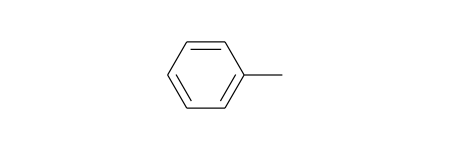

In [664]:
print m1
m1

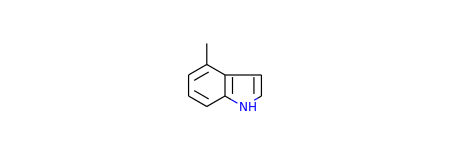

In [665]:
print m2
m2

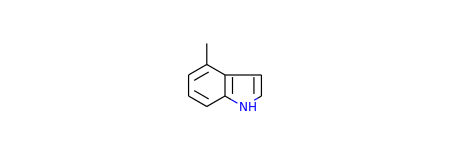

In [666]:
print m3
m3

or None on failure:

In [667]:
m = Chem.MolFromMolFile('data/invalid.mol')
m is None

True

An attempt is made to provide sensible error messages:

In [668]:
m1 = Chem.MolFromSmiles('CO(C)C')

displays a message like: [12:18:01] `Explicit valence for atom # 1 O greater than permitted `.

In [669]:
m2 = Chem.MolFromSmiles('c1cc1')

displays something like: `[12:20:41] Can't kekulize mol`.
In each case the value `None` is returned:

In [670]:
print m1 is None
print m2 is None

True
True


###Reading sets of molecules

Groups of molecules are read using a Supplier (for example, an `SDMolSupplier` or a `SmilesMolSupplier`):

In [671]:
suppl = Chem.SDMolSupplier('data/5ht3ligs.sdf')
for mol in suppl:
    print mol.GetNumAtoms()

20
24
24
26


You can easily produce lists of molecules from a Supplier:

In [672]:
mols = [x for x in suppl]
len(mols)

4

or just treat the Supplier itself as a random-access object:

In [673]:
suppl[0].GetNumAtoms()

20

A good practice is to test each molecule to see if it was correctly read
before working with it:

In [674]:
suppl = Chem.SDMolSupplier('data/5ht3ligs.sdf')
for mol in suppl:
    if mol is None: continue
    print mol.GetNumAtoms()

20
24
24
26


An alternate type of Supplier, the `ForwardSDMolSupplier` can be used to read from
file-like objects:

In [675]:
inf = file('data/5ht3ligs.sdf')
fsuppl = Chem.ForwardSDMolSupplier(inf)
for mol in fsuppl:
    if mol is None: continue
    print mol.GetNumAtoms()

20
24
24
26


This means that they can be used to read from compressed files:

In [676]:
import gzip
inf = gzip.open('data/actives_5ht3.sdf.gz')
gzsuppl = Chem.ForwardSDMolSupplier(inf)
ms = [x for x in gzsuppl if x is not None]
len(ms)

180

Note that ForwardSDMolSuppliers cannot be used as random-access objects:

In [677]:
try:
    fsuppl[0]
except TypeError as e:
    print e

'ForwardSDMolSupplier' object does not support indexing


### Writing molecules

Single molecules can be converted to text using several functions
present in the `rdkit.Chem` module.

For example, for SMILES:

CC(O)c1ccccc1
C[C@H](O)c1ccccc1


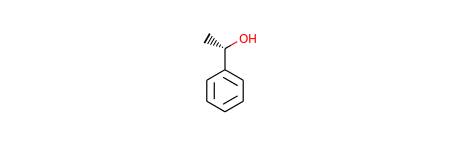

In [678]:
m = Chem.MolFromMolFile('data/chiral.mol')
print Chem.MolToSmiles(m)
print Chem.MolToSmiles(m,isomericSmiles=True)
m

Note that the SMILES provided is canonical, so the output should be the
same no matter how a particular molecule is input:

In [679]:
print Chem.MolToSmiles(Chem.MolFromSmiles('C1=CC=CN=C1'))
print Chem.MolToSmiles(Chem.MolFromSmiles('c1cccnc1'))
print Chem.MolToSmiles(Chem.MolFromSmiles('n1ccccc1'))

c1ccncc1
c1ccncc1
c1ccncc1


If you'd like to have the Kekule form of the SMILES, first Kekulize the
molecule, then use the “kekuleSmiles” option:

CC(O)C1=CC=CC=C1


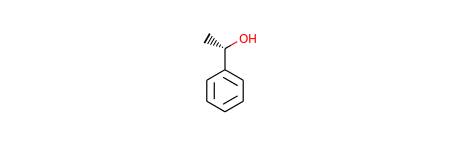

In [680]:
Chem.Kekulize(m)
print Chem.MolToSmiles(m,kekuleSmiles=True)
m

Note: as of this writing (Aug 2008), the smiles provided when one
requests `kekuleSmiles` are not canonical. The limitation is not in the
SMILES generation, but in the kekulization itself.
MDL Mol blocks are also available:

In [681]:
m2 = Chem.MolFromSmiles('C1CCC1')
print Chem.MolToMolBlock(m2)


     RDKit          

  4  4  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



To include names in the mol blocks, set the molecule's `_Name`
property:

In [682]:
m2.SetProp("_Name","cyclobutane")
print Chem.MolToMolBlock(m2)

cyclobutane
     RDKit          

  4  4  0  0  0  0  0  0  0  0999 V2000
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



It's usually preferable to have a depiction in the Mol block, this can
be generated using functionality in the `rdkit.Chem.AllChem` module (see
the [`Chem` vs `AllChem`](#s15) section for more information).

You can either include 2D coordinates (i.e. a depiction):

In [683]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(m2)
print Chem.MolToMolBlock(m2)

cyclobutane
     RDKit          2D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0607   -0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0000   -1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0607    0.0000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0000    1.0607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



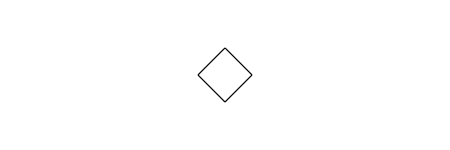

In [684]:
m2

Or you can add 3D coordinates by embedding the molecule:

In [685]:
AllChem.EmbedMolecule(m2)
AllChem.UFFOptimizeMolecule(m2)
print Chem.MolToMolBlock(m2)

cyclobutane
     RDKit          3D

  4  4  0  0  0  0  0  0  0  0999 V2000
   -0.9631   -0.4672   -0.0142 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4672    0.9632   -0.0021 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9631    0.4672    0.0142 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4672   -0.9632    0.0021 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



The optimization step isn't necessary, but it substantially improves the
quality of the conformation.

To get good conformations, it's almost always a good idea to add
hydrogens to the molecule first:

In [686]:
m3 = Chem.AddHs(m2)
AllChem.EmbedMolecule(m3)
AllChem.UFFOptimizeMolecule(m3)

0

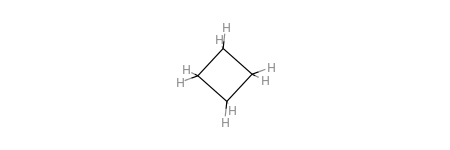

In [687]:
m3

These can then be removed:

In [688]:
m3 = Chem.RemoveHs(m3)
print Chem.MolToMolBlock(m3)

cyclobutane
     RDKit          3D

  4  4  0  0  0  0  0  0  0  0999 V2000
    1.0629    0.0310   -0.1633 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.0727    1.0373   -0.2758 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.0629   -0.0310    0.1633 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.0727   -1.0373    0.2758 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



If you'd like to write the molecules to a file, use Python file objects:

In [689]:
print >> file('data/foo.mol','w+'),Chem.MolToMolBlock(m2)

In [690]:
!cat data/foo.mol

cyclobutane
     RDKit          3D

  4  4  0  0  0  0  0  0  0  0999 V2000
   -0.9631   -0.4672   -0.0142 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.4672    0.9632   -0.0021 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.9631    0.4672    0.0142 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.4672   -0.9632    0.0021 C   0  0  0  0  0  0  0  0  0  0  0  0
  1  2  1  0
  2  3  1  0
  3  4  1  0
  4  1  1  0
M  END



### Writing sets of molecules

Multiple molecules can be written to a file using an `rdkit.Chem.rdmolfiles.SDWriter` object:

In [691]:
w = Chem.SDWriter('data/foo.sdf')
for m in mols:
    w.write(m)

An `SDWriter` can also be initialized using a file-like object:

In [692]:
from StringIO import StringIO
sio = StringIO()
w = Chem.SDWriter(sio)
for m in mols:
    w.write(m)
w.flush()
print sio.getvalue()

mol-295
     RDKit          3D

 20 22  0  0  1  0  0  0  0  0999 V2000
    2.3200    0.0800   -0.1000 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.8400   -1.2200    0.1200 C   0  0  0  0  0  0  0  0  0  0  0  0
    3.6800    0.0800    0.2600 C   0  0  0  0  0  0  0  0  0  0  0  0
    1.7400    1.2800   -0.5600 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.9400   -1.9200    0.6000 C   0  0  0  0  0  0  0  0  0  0  0  0
    0.5400   -1.7400   -0.0800 C   0  0  0  0  0  0  0  0  0  0  0  0
    4.0200   -1.1400    0.6600 N   0  0  0  0  0  0  0  0  0  0  0  0
    4.4600    1.2600    0.1600 C   0  0  0  0  0  0  0  0  0  0  0  0
    2.5200    2.4600   -0.6600 C   0  0  0  0  0  0  0  0  0  0  0  0
   -0.3800   -1.0400   -0.5000 O   0  0  0  0  0  0  0  0  0  0  0  0
    0.3000   -2.9200    0.1800 O   0  0  0  0  0  0  0  0  0  0  0  0
    3.8800    2.4400   -0.3000 C   0  0  0  0  0  0  0  0  0  0  0  0
   -1.6800   -1.2400   -0.7800 C   0  0  0  0  0  0  0  0  0  0  0  0
   -2.5800   -0.32

Other available Writers include the `SmilesWriter`
and the `TDTWriter`.

<a id='s3'></a>
##Working with Molecules

### Looping over Atoms and Bonds

Once you have a molecule, it's easy to loop over its atoms and bonds:

In [693]:
m = Chem.MolFromSmiles('C1OC1')
for atom in m.GetAtoms():
    print atom.GetAtomicNum()
print m.GetBonds()[0].GetBondType()

6
8
6
SINGLE


You can also request individual bonds or atoms:

In [694]:
print m.GetAtomWithIdx(0).GetSymbol()
print m.GetAtomWithIdx(0).GetExplicitValence()
print m.GetBondWithIdx(0).GetBeginAtomIdx()
print m.GetBondWithIdx(0).GetEndAtomIdx()
print m.GetBondBetweenAtoms(0,1).GetBondType()

C
2
0
1
SINGLE


Atoms keep track of their neighbors:

In [695]:
atom = m.GetAtomWithIdx(0)
print[x.GetAtomicNum() for x in atom.GetNeighbors()]
print len(x.GetBonds())

[8, 6]
2


###Ring Information
Atoms and bonds both carry information about the molecule’s rings:

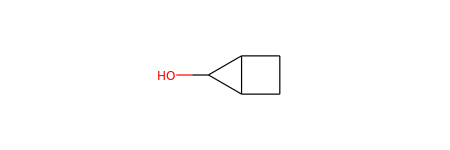

In [696]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
m

In [697]:
print m.GetAtomWithIdx(0).IsInRing()
print m.GetAtomWithIdx(1).IsInRing()
print m.GetAtomWithIdx(2).IsInRingSize(3)
print m.GetAtomWithIdx(2).IsInRingSize(4)
print m.GetAtomWithIdx(2).IsInRingSize(5)
print m.GetBondWithIdx(1).IsInRingSize(3)
print m.GetBondWithIdx(1).IsInRing()

False
True
True
True
False
True
True


But note that the information is only about the smallest rings:

In [698]:
m.GetAtomWithIdx(1).IsInRingSize(5)

False

More detail about the smallest set of smallest rings (SSSR) is
available:

In [699]:
ssr = Chem.GetSymmSSSR(m)
print len(ssr)
print list(ssr[0])
print list(ssr[1])

2
[1, 2, 3]
[4, 5, 2, 3]


As the name indicates, this is a symmetrized SSSR; if you are interested
in the number of “true” SSSR, use the GetSSSR function.

In [700]:
Chem.GetSSSR(m)

2

The distinction between symmetrized and non-symmetrized SSSR is
discussed in more detail below in the section The SSSR Problem.

For more efficient queries about a molecule's ring systems (avoiding
repeated calls to `Mol.GetAtomWithIdx`), use the
`rdkit.Chem.rdchem.RingInfo` class:

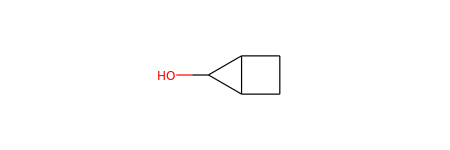

In [701]:
m = Chem.MolFromSmiles('OC1C2C1CC2')
m

In [702]:
ri = m.GetRingInfo()
print ri.NumAtomRings(0)
print ri.NumAtomRings(1)
print ri.NumAtomRings(2)
print ri.IsAtomInRingOfSize(1,3)
print ri.IsBondInRingOfSize(1,3)

0
1
2
True
True


### Modifying molecules

Normally molecules are stored in the RDKit with the hydrogen atoms
implicit (e.g. not explicitly present in the molecular graph. When it is
useful to have the hydrogens explicitly present, for example when
generating or optimizing the 3D geometry, the `rdkit.Chem.rdmolops.AddHs`
function can be used:

In [703]:
m=Chem.MolFromSmiles('CCO')
print m.GetNumAtoms()
m2 = Chem.AddHs(m)
print m2.GetNumAtoms()

3
9


The Hs can be removed again using the `RemoveHs`
function:

In [704]:
m3 = Chem.RemoveHs(m2)
m3.GetNumAtoms()

3

RDKit molecules are usually stored with the bonds in aromatic rings
having aromatic bond types. This can be changed with the
rdkit.Chem.rdmolops.Kekulize function:

In [705]:
m = Chem.MolFromSmiles('c1ccccc1')
print m.GetBondWithIdx(0).GetBondType()
Chem.Kekulize(m)
print m.GetBondWithIdx(0).GetBondType()
print m.GetBondWithIdx(1).GetBondType()

AROMATIC
DOUBLE
SINGLE


The bonds are still marked as being aromatic:

In [706]:
m.GetBondWithIdx(1).GetIsAromatic()

True

and can be restored to the aromatic bond type using the
`rdkit.Chem.rdmolops.SanitizeMol` function:

In [707]:
Chem.SanitizeMol(m)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [708]:
m.GetBondWithIdx(0).GetBondType()

rdkit.Chem.rdchem.BondType.AROMATIC

The value returned by `SanitizeMol()` indicates that no problems were
encountered.

### Working with 2D molecules: Generating Depictions

The RDKit has a library for generating depictions (sets of 2D)
coordinates for molecules. This library, which is part of the AllChem
module, is accessed using the `rdkit.Chem.rdDepictor.Compute2DCoords`
function:

In [709]:
m = Chem.MolFromSmiles('c1nccc2n1ccc2CCO')
AllChem.Compute2DCoords(m)

0

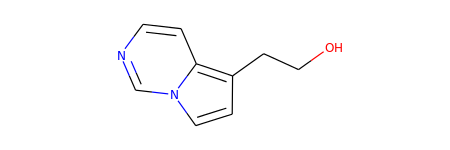

In [710]:
m

The 2D conformation is constructed in a canonical orientation and is
built to minimize intramolecular clashes, i.e. to maximize the clarity
of the drawing.

If you have a set of molecules that share a common template and you'd
like to align them to that template, you can do so as follows:

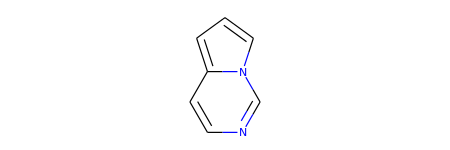

In [711]:
template = Chem.MolFromSmiles('c1nccc2n1ccc2')
template

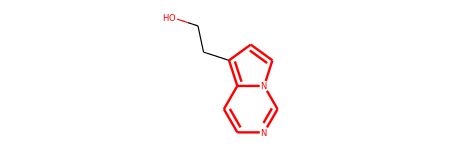

In [712]:
AllChem.Compute2DCoords(template)
AllChem.GenerateDepictionMatching2DStructure(m,template)
m

Running this process for a couple of other molecules gives the following
depictions:

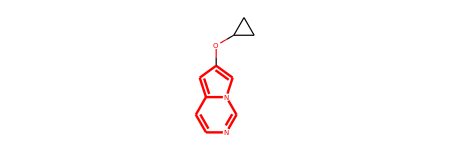

In [713]:
m2 = Chem.MolFromSmiles('c1nccc2n1cc(OC3CC3)c2')
AllChem.Compute2DCoords(m2)
AllChem.GenerateDepictionMatching2DStructure(m2,template)
m2

Another option for Compute2DCoords allows you to generate 2D depictions
for molecules that closely mimic 3D conformations. This is available
using the function `rdkit.Chem.AllChem.GenerateDepictionMatching3DStructure`.

Here is an illustration of the results using the ligand from PDB structure 1XP0:

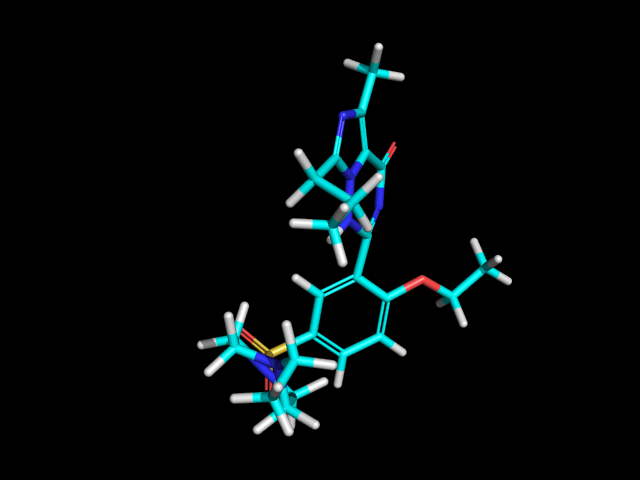

In [714]:
Image('images/picture_2.png')

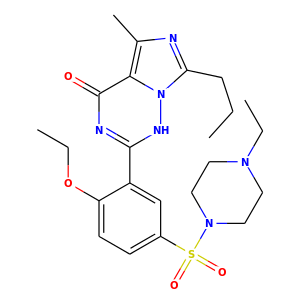

In [715]:
 Image('images/picture_4.png')

More fine-grained control can be obtained using the core function
`rdkit.Chem.rdDepictor.Compute2DCoordsMimicDistmat`, but that is beyond
the scope of this document. See the implementation of
`GenerateDepictionMatching3DStructure` in `AllChem.py` for an example of how
it is used.

### Working with 3D Molecules

The RDKit can generate conformations for molecules using distance geometry. [[1]](#c1) The algorithm followed is:

1.  The molecule's distance bounds matrix is calculated based on the
    connection table and a set of rules.
2.  The bounds matrix is smoothed using a triangle-bounds smoothing
    algorithm.
3.  A random distance matrix that satisfies the bounds matrix is
    generated.
4.  This distance matrix is embedded in 3D dimensions (producing
    coordinates for each atom).
5.  The resulting coordinates are cleaned up somewhat using a crude
    force field and the bounds matrix.

Multiple conformations can be generated by repeating steps 4 and 5
several times, using a different random distance matrix each time.

Note that the conformations that result from this procedure tend to be
fairly ugly. They should be cleaned up using a force field. This can be
done within the RDKit using its implementation of the Universal Force
Field (UFF). [[2]](#c2)

The full process of embedding and optimizing a molecule is easier than
all the above verbiage makes it sound:

In [716]:
m = Chem.MolFromSmiles('C1CCC1OC')
m2 = Chem.AddHs(m)
AllChem.EmbedMolecule(m2)
AllChem.UFFOptimizeMolecule(m2)

0

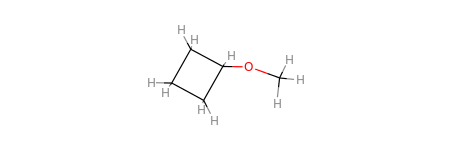

In [717]:
m2

The RDKit also has an implementation of the MMFF94 force field
available. [[3]](#c3), [[4]](#c4), [[5]](#c5), [[6]](#c6), [[7]](#c7) Please note that the MMFF atom
typing code uses its own aromaticity model, so the aromaticity flags of
the molecule will be modified after calling MMFF-related methods.

In [718]:
m = Chem.MolFromSmiles('C1CCC1OC')
m2 = Chem.AddHs(m)
AllChem.EmbedMolecule(m2)
AllChem.MMFFOptimizeMolecule(m2)

0

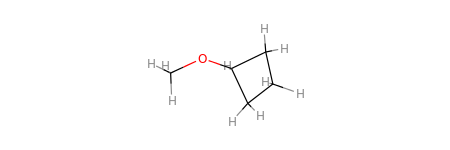

In [719]:
m2

With the RDKit, also multiple conformers can be generated. The option
`numConfs` allows the user to set the number of conformers that should be
generated. These conformers can be aligned to each other and the RMS
values calculated.

In [720]:
m = Chem.MolFromSmiles('C1CCC1OC')
m2 = Chem.AddHs(m)
cids = AllChem.EmbedMultipleConfs(m2, numConfs=10)
print len(cids)

for cid in cids:
    _ = AllChem.MMFFOptimizeMolecule(m2, confId=cid)
rmslist = []
AllChem.AlignMolConformers(m2, RMSlist=rmslist)
print len(rmslist)

10
9


rmslist contains the RMS values between the first conformer and all
others. The RMS between two specific conformers (e.g. 1 and 9) can also
be calculated. The flag prealigned lets the user specify if the
conformers are already aligned (by default, the function aligns them).

In [721]:
rms = AllChem.GetConformerRMS(m2, 1, 9, prealigned=True)

More 3D functionality of the RDKit is described in the Cookbook.

*Disclaimer/Warning*: Conformation generation is a difficult and subtle
task. The 2D-\>3D conversion provided within the RDKit is not intended
to be a replacement for a “real” conformational analysis tool; it merely
provides quick 3D structures for cases when they are required.

### Preserving Molecules

Molecules can be converted to and from text using Python's pickling
machinery:

In [722]:
m = Chem.MolFromSmiles('c1ccncc1')
import cPickle
pkl = cPickle.dumps(m)
print type(pkl)
m2=cPickle.loads(pkl)
print Chem.MolToSmiles(m2)

<type 'str'>
c1ccncc1


The RDKit pickle format is fairly compact and it is much, much faster to
build a molecule from a pickle than from a Mol file or SMILES string, so
storing molecules you will be working with repeatedly as pickles can be
a good idea.
The raw binary data that is encapsulated in a pickle can also be
directly obtained from a molecule:

In [723]:
binStr = m.ToBinary()

This can be used to reconstruct molecules using the Chem.Mol
constructor:

In [724]:
m2 = Chem.Mol(binStr)
print Chem.MolToSmiles(m2)
print len(binStr)
print len(pkl)

c1ccncc1
123
475


Note that this huge difference in text length is because we didn't tell
python to use its most efficient representation of the pickle:

In [725]:
pkl = cPickle.dumps(m,2)
len(pkl)

157

The small overhead associated with python's pickling machinery normally
doesn't end up making much of a difference for collections of larger
molecules (the extra data associated with the pickle is independent of
the size of the molecule, while the binary string increases in length as
the molecule gets larger).

*Tip*: The performance difference associated with storing molecules in a
pickled form on disk instead of constantly reparsing an SD file or
SMILES table is difficult to overstate. In a test I just ran on my
laptop, loading a set of 699 drug-like molecules from an SD file took
10.8 seconds; loading the same molecules from a pickle file took 0.7
seconds. The pickle file is also smaller – 1/3 the size of the SD file –
but this difference is not always so dramatic (it's a particularly fat
SD file).

### Drawing Molecules

The RDKit has some built-in functionality for creating images from
molecules found in the `rdkit.Chem.Draw` package:

In [726]:
suppl = Chem.SDMolSupplier('data/cdk2.sdf')
ms = [x for x in suppl if x is not None]

for m in ms:
    tmp=AllChem.Compute2DCoords(m)

from rdkit.Chem import Draw
Draw.MolToFile(ms[0],'images/cdk2_mol1.png')
Draw.MolToFile(ms[1],'images/cdk2_mol2.png')

Producing these images:

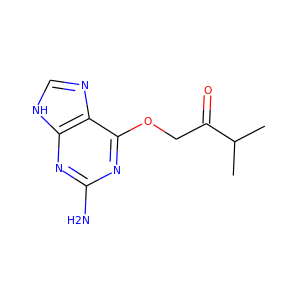

In [727]:
Image('images/cdk2_mol1.png')

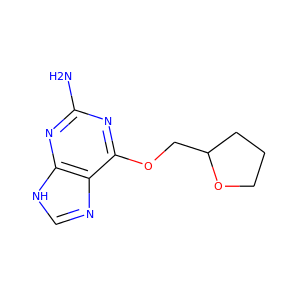

In [728]:
Image('images/cdk2_mol2.png')

It's also possible to produce an image grid out of a set of molecules:

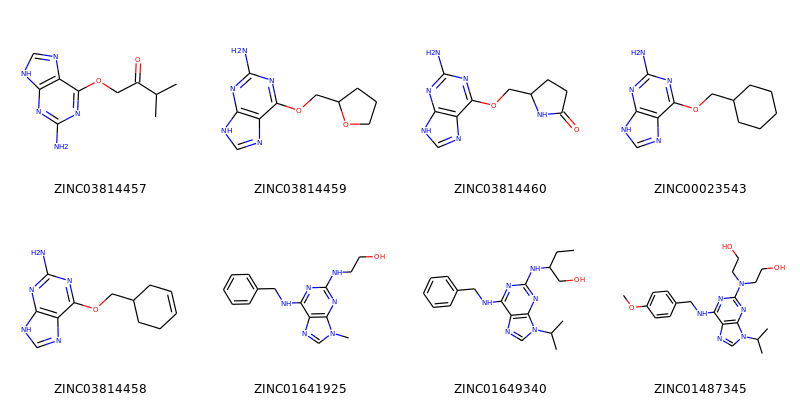

In [729]:
img=Draw.MolsToGridImage(ms[:8],molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in ms[:8]])
img

This returns a PIL image, which can then be saved to a file:

In [730]:
img.save('images/cdk2_molgrid.png')

The result looks like this:

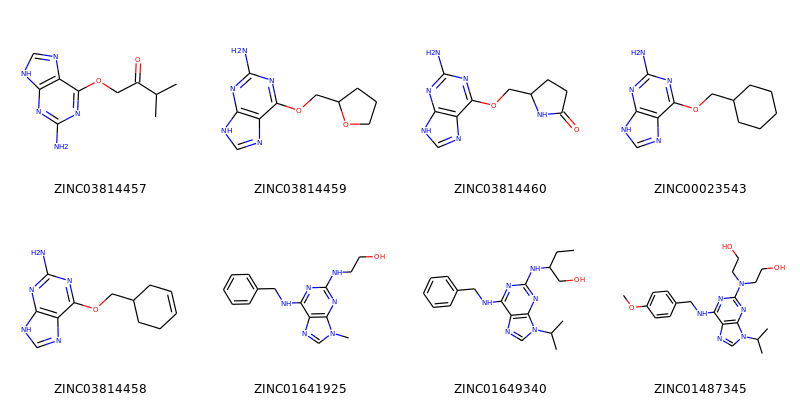

In [731]:
Image('images/cdk2_molgrid.png')

These would of course look better if the common core were aligned. This
is easy enough to do:

In [732]:
p = Chem.MolFromSmiles('[nH]1cnc2cncnc21')
subms = [x for x in ms if x.HasSubstructMatch(p)]
print len(subms)
AllChem.Compute2DCoords(p)
for m in subms: 
    AllChem.GenerateDepictionMatching2DStructure(m,p)
img=Draw.MolsToGridImage(subms,molsPerRow=4,subImgSize=(200,200),legends=[x.GetProp("_Name") for x in subms])

14


The result looks like this:

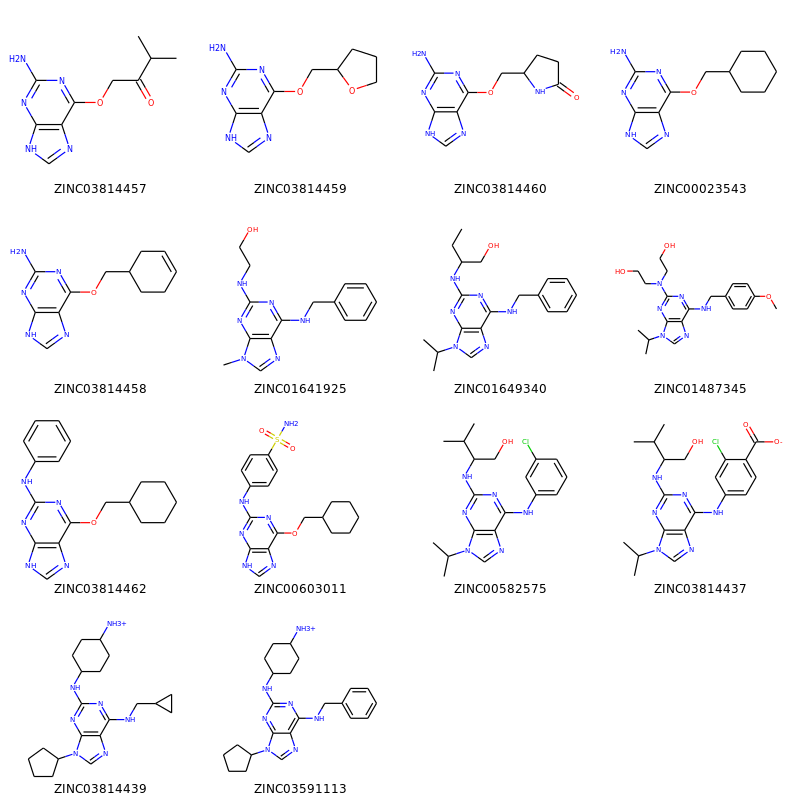

In [733]:
img

<a id='s4'></a>
##Substructure Searching

Substructure matching can be done using query molecules built from
SMARTS:

In [734]:
m = Chem.MolFromSmiles('c1ccccc1O')
patt = Chem.MolFromSmarts('ccO')
m.HasSubstructMatch(patt)

True

In [735]:
m.GetSubstructMatch(patt)

(0, 5, 6)

Those are the atom indices in `m`, ordered as `patt`'s atoms. To get all
of the matches:

In [736]:
m.GetSubstructMatches(patt)

((0, 5, 6), (4, 5, 6))

This can be used to easily filter lists of molecules:

In [737]:
suppl = Chem.SDMolSupplier('data/actives_5ht3.sdf')
patt = Chem.MolFromSmarts('c[NH1]')
matches = []
for mol in suppl:
    if mol.HasSubstructMatch(patt):
        matches.append(mol)
len(matches)

22

We can write the same thing more compactly using Python's list
comprehension syntax:

In [738]:
matches = [x for x in suppl if x.HasSubstructMatch(patt)]
len(matches)

22

Substructure matching can also be done using molecules built from SMILES
instead of SMARTS:

In [739]:
m = Chem.MolFromSmiles('C1=CC=CC=C1OC')
print m.HasSubstructMatch(Chem.MolFromSmarts('CO'))
print m.HasSubstructMatch(Chem.MolFromSmiles('CO'))

True
True


But don't forget that the semantics of the two languages are not exactly
equivalent:

In [740]:
print m.HasSubstructMatch(Chem.MolFromSmiles('COC'))
print m.HasSubstructMatch(Chem.MolFromSmarts('COC'))
print m.HasSubstructMatch(Chem.MolFromSmarts('COc')) # need an aromatic C

True
False
True


### Stereochemistry in substructure matches

By default information about stereochemistry is not used in substructure
searches:

In [741]:
m = Chem.MolFromSmiles('CC[C@H](F)Cl')
print m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'))
print m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl'))
print m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'))

True
True
True


But this can be changed via the `useChirality` argument:

In [742]:
print m.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'),useChirality=True)
print m.HasSubstructMatch(Chem.MolFromSmiles('C[C@@H](F)Cl'),useChirality=True)
print m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'),useChirality=True)

True
False
True


Notice that when useChirality is set a non-chiral query **does** match a
chiral molecule. The same is not true for a chiral query and a
non-chiral molecule:

In [743]:
print m.HasSubstructMatch(Chem.MolFromSmiles('CC(F)Cl'))
m2 = Chem.MolFromSmiles('CCC(F)Cl')
print m2.HasSubstructMatch(Chem.MolFromSmiles('C[C@H](F)Cl'),useChirality=True)

True
False


<a id='s5'></a>
##Chemical Transformations

The RDKit contains a number of functions for modifying molecules. Note
that these transformation functions are intended to provide an easy way
to make simple modifications to molecules. For more complex
transformations, use the Chemical Reactions functionality.

### Substructure-based transformations

There's a variety of functionality for using the RDKit's
substructure-matching machinery for doing quick molecular
transformations. These transformations include deleting substructures:


In [744]:
m = Chem.MolFromSmiles('CC(=O)O')
patt = Chem.MolFromSmarts('C(=O)[OH]')
rm = AllChem.DeleteSubstructs(m,patt)
Chem.MolToSmiles(rm)

'C'

replacing substructures:

In [745]:
repl = Chem.MolFromSmiles('OC')
patt = Chem.MolFromSmarts('[$(NC(=O))]')
m = Chem.MolFromSmiles('CC(=O)N')
rms = AllChem.ReplaceSubstructs(m,patt,repl)
print rms
Chem.MolToSmiles(rms[0])

(<rdkit.Chem.rdchem.Mol object at 0x7f7f140717d0>,)


'COC(C)=O'

as well as simple SAR-table transformations like removing side chains:

In [746]:
m1 = Chem.MolFromSmiles('BrCCc1cncnc1C(=O)O')
core = Chem.MolFromSmiles('c1cncnc1')
tmp = Chem.ReplaceSidechains(m1,core)
Chem.MolToSmiles(tmp)

'[*]c1cncnc1[*]'

and removing cores:

In [747]:
tmp = Chem.ReplaceCore(m1,core)
Chem.MolToSmiles(tmp)

'[*]C(=O)O.[*]CCBr'

To get more detail about the sidechains (e.g. sidechain labels), use
isomeric smiles:

In [748]:
Chem.MolToSmiles(tmp,True)

'[1*]CCBr.[2*]C(=O)O'

By default the sidechains are labeled based on the order they are found.
They can also be labeled according by the number of that core-atom
they're attached to:

In [749]:
m1 = Chem.MolFromSmiles('c1c(CCO)ncnc1C(=O)O')
tmp = Chem.ReplaceCore(m1,core,labelByIndex=True)
Chem.MolToSmiles(tmp,True)

'[1*]CCO.[5*]C(=O)O'

`rdkit.Chem.rdmolops.ReplaceCore` returns the sidechains in a single
molecule. This can be split into separate molecules using
`rdkit.Chem.rdmolops.GetMolFrags`:

In [750]:
rs = Chem.GetMolFrags(tmp,asMols=True)
print len(rs)
print Chem.MolToSmiles(rs[0],True)
print Chem.MolToSmiles(rs[1],True)

2
[1*]CCO
[5*]C(=O)O


### Murcko Decomposition

The RDKit provides standard Murcko-type decomposition [[8]](#c8) of molecules
into scaffolds:

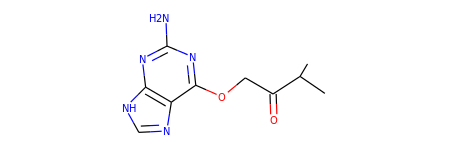

In [751]:
from rdkit.Chem.Scaffolds import MurckoScaffold
cdk2mols = Chem.SDMolSupplier('data/cdk2.sdf')
m1 = cdk2mols[0]
m1

c1ncc2nc[nH]c2n1


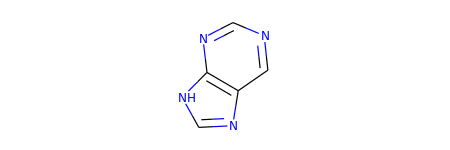

In [752]:
core = MurckoScaffold.GetScaffoldForMol(m1)
print Chem.MolToSmiles(core)
core

or into a generic framework:

C1CCC2CCCC2C1


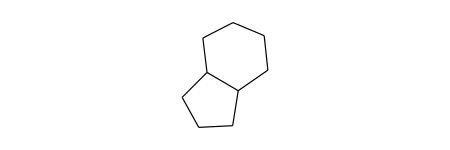

In [753]:
fw = MurckoScaffold.MakeScaffoldGeneric(core)
print Chem.MolToSmiles(fw)
fw

<a id='s6'></a>
##Maximum Common Substructure

The FindMCS function find a maximum common substructure (MCS) of two or
more molecules:

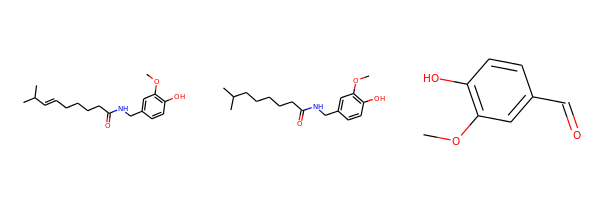

In [754]:
from rdkit.Chem import rdFMCS
mol1 = Chem.MolFromSmiles("O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C")
mol2 = Chem.MolFromSmiles("CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC")
mol3 = Chem.MolFromSmiles("c1(C=O)cc(OC)c(O)cc1")
mols = [mol1,mol2,mol3]
Draw.MolsToGridImage(mols)

In [755]:
res = rdFMCS.FindMCS(mols)
res
print res.numAtoms
print res.numBonds
print res.smartsString
print res.canceled

10
10
[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]
False


It returns an MCSResult instance with information about the number of
atoms and bonds in the MCS, the SMARTS string which matches the
identified MCS, and a flag saying if the algorithm timed out. If no MCS
is found then the number of atoms and bonds is set to 0 and the SMARTS
to `''`.

By default, two atoms match if they are the same element and two bonds
match if they have the same bond type. Specify `atomCompare` and
`bondCompare` to use different comparison functions, as in:

In [756]:
mols = (Chem.MolFromSmiles('NCC'),Chem.MolFromSmiles('OC=C'))
print rdFMCS.FindMCS(mols).smartsString
print rdFMCS.FindMCS(mols, atomCompare=rdFMCS.AtomCompare.CompareAny).smartsString
print rdFMCS.FindMCS(mols, bondCompare=rdFMCS.BondCompare.CompareAny).smartsString


[#7,#8]-[#6]
[#6]-,=[#6]


The options for the `atomCompare` argument are: `CompareAny` says that any
atom matches any other atom, `CompareElements` compares by element type,
and `CompareIsotopes` matches based on the isotope label. Isotope labels
can be used to implement user-defined atom types. A `bondCompare` of
`CompareAny` says that any bond matches any other bond, `CompareOrderExact`
says bonds are equivalent if and only if they have the same bond type,
and `CompareOrder` allows single and aromatic bonds to match each other,
but requires an exact order match otherwise:

In [757]:
mols = (Chem.MolFromSmiles('c1ccccc1'),Chem.MolFromSmiles('C1CCCC=C1'))
print rdFMCS.FindMCS(mols,bondCompare=rdFMCS.BondCompare.CompareAny).smartsString
print rdFMCS.FindMCS(mols,bondCompare=rdFMCS.BondCompare.CompareOrderExact).smartsString
print rdFMCS.FindMCS(mols,bondCompare=rdFMCS.BondCompare.CompareOrder).smartsString

[#6]1:,-[#6]:,-[#6]:,-[#6]:,-[#6]:,=[#6]:,-1

[#6](:,-[#6]:,-[#6]:,-[#6]):,-[#6]:,-[#6]


A substructure has both atoms and bonds. By default, the algorithm
attempts to maximize the number of bonds found. You can change this by
setting the `maximizeBonds` argument to False. Maximizing the number of
bonds tends to maximize the number of rings, although two small rings
may have fewer bonds than one large ring.

You might not want a 3-valent nitrogen to match one which is 5-valent.
The default `matchValences` value of False ignores valence information.
When True, the atomCompare setting is modified to also require that the
two atoms have the same valency.

In [758]:
mols = (Chem.MolFromSmiles('NC1OC1'),Chem.MolFromSmiles('C1OC1[N+](=O)[O-]'))
print rdFMCS.FindMCS(mols).numAtoms
print rdFMCS.FindMCS(mols, matchValences=True).numBonds

4
3


It can be strange to see a linear carbon chain match a carbon ring,
which is what the `ringMatchesRingOnly` default of False does. If you
set it to True then ring bonds will only match ring bonds.

In [759]:
mols = [Chem.MolFromSmiles("C1CCC1CCC"), Chem.MolFromSmiles("C1CCCCCC1")]
print rdFMCS.FindMCS(mols).smartsString
print rdFMCS.FindMCS(mols, ringMatchesRingOnly=True).smartsString

[#6](-[#6]-[#6])-[#6]-[#6]-[#6]-[#6]
[#6](-[#6]-[#6])-[#6]


You can further restrict things and require that partial rings (as in
this case) are not allowed. That is, if an atom is part of the MCS and
the atom is in a ring of the entire molecule then that atom is also in a
ring of the MCS. Set `completeRingsOnly` to True to toggle this
requirement and also sets ringMatchesRingOnly to True.

In [760]:
mols = [Chem.MolFromSmiles("CCC1CC2C1CN2"), Chem.MolFromSmiles("C1CC2C1CC2")]
print rdFMCS.FindMCS(mols).smartsString
print rdFMCS.FindMCS(mols, ringMatchesRingOnly=True).smartsString
print rdFMCS.FindMCS(mols, completeRingsOnly=True).smartsString

[#6]1-[#6]-[#6](-[#6]-1-[#6])-[#6]
[#6](-[#6]-[#6]-[#6]-[#6])-[#6]
[#6]1-[#6]-[#6]-[#6]-1


The MCS algorithm will exhaustively search for a maximum common
substructure. Typically this takes a fraction of a second, but for some
comparisons this can take minutes or longer. Use the `timeout` parameter
to stop the search after the given number of seconds (wall-clock
seconds, not CPU seconds) and return the best match found in that time.
If timeout is reached then the `canceled` property of the `MCSResult` will
be True instead of False.

In [761]:
mols = [Chem.MolFromSmiles("Nc1ccccc1"*100), Chem.MolFromSmiles("Nc1ccccccccc1"*100)]
rdFMCS.FindMCS(mols, timeout=1).canceled

True

(The MCS after 50 seconds contained 511 atoms.)

<a id='s7'></a>
##Fingerprinting and Molecular Similarity

The RDKit has a variety of built-in functionality for generating
molecular fingerprints and using them to calculate molecular similarity.

### Topological Fingerprints

In [762]:
from rdkit import DataStructs
from rdkit.Chem.Fingerprints import FingerprintMols
ms = [Chem.MolFromSmiles('CCOC'),Chem.MolFromSmiles('CCO'),Chem.MolFromSmiles('COC')]
fps = [FingerprintMols.FingerprintMol(x) for x in ms]
print DataStructs.FingerprintSimilarity(fps[0],fps[1])
print DataStructs.FingerprintSimilarity(fps[0],fps[2])
print DataStructs.FingerprintSimilarity(fps[1],fps[2])

0.6
0.4
0.25


The fingerprinting algorithm used is similar to that used in the
Daylight fingerprinter: it identifies and hashes topological paths (e.g.
along bonds) in the molecule and then uses them to set bits in a
fingerprint of user-specified lengths. After all paths have been
identified, the fingerprint is typically folded down until a particular
density of set bits is obtained.

The default set of parameters used by the fingerprinter is: - minimum
path size: 1 bond - maximum path size: 7 bonds - fingerprint size: 2048
bits - number of bits set per hash: 2 - minimum fingerprint size: 64
bits - target on-bit density 0.3

You can control these by calling `rdkit.Chem.rdmolops.RDKFingerprint`
directly; this will return an unfolded fingerprint that you can then
fold to the desired density. The function
`rdkit.Chem.Fingerprints.FingerprintMols.FingerprintMol` (written in
python) shows how this is done.

The default similarity metric used by
`rdkit.DataStructs.FingerprintSimilarity` is the Tanimoto similarity. One
can use different similarity metrics:

In [763]:
DataStructs.FingerprintSimilarity(fps[0],fps[1], metric=DataStructs.DiceSimilarity)

0.75

Available similarity metrics include Tanimoto, Dice, Cosine, Sokal,
Russel, Kulczynski, McConnaughey, and Tversky.

### MACCS Keys

There is a SMARTS-based implementation of the 166 public MACCS keys.

In [764]:
from rdkit.Chem import MACCSkeys
fps = [MACCSkeys.GenMACCSKeys(x) for x in ms]
print DataStructs.FingerprintSimilarity(fps[0],fps[1])
print DataStructs.FingerprintSimilarity(fps[0],fps[2])
print DataStructs.FingerprintSimilarity(fps[1],fps[2])

0.5
0.538461538462
0.214285714286


The MACCS keys were critically evaluated and compared to other MACCS
implementations in Q3 2008. In cases where the public keys are fully
defined, things looked pretty good.

### Atom Pairs and Topological Torsions

Atom-pair descriptors [[9]](#c9) are available in several different forms. The
standard form is as fingerprint including counts for each bit instead of
just zeros and ones:

In [765]:
from rdkit.Chem.AtomPairs import Pairs
ms = [Chem.MolFromSmiles('C1CCC1OCC'),Chem.MolFromSmiles('CC(C)OCC'),Chem.MolFromSmiles('CCOCC')]
pairFps = [Pairs.GetAtomPairFingerprint(x) for x in ms]

Because the space of bits that can be included in atom-pair fingerprints
is huge, they are stored in a sparse manner. We can get the list of bits
and their counts for each fingerprint as a dictionary:

In [766]:
d = pairFps[-1].GetNonzeroElements()
print d[541732]
print d[1606690]

1
2


Descriptions of the bits are also available:

In [767]:
Pairs.ExplainPairScore(558115)

(('C', 1, 0), 3, ('C', 2, 0))

The above means: C with 1 neighbor and 0 pi electrons which is 3 bonds
from a C with 2 neighbors and 0 pi electrons

The usual metric for similarity between atom-pair fingerprints is Dice
similarity:

In [768]:
from rdkit import DataStructs
print DataStructs.DiceSimilarity(pairFps[0],pairFps[1])
print DataStructs.DiceSimilarity(pairFps[0],pairFps[2])
print DataStructs.DiceSimilarity(pairFps[1],pairFps[2])

0.333333333333
0.258064516129
0.56


It's also possible to get atom-pair descriptors encoded as a standard
bit vector fingerprint (ignoring the count information):

In [769]:
pairFps = [Pairs.GetAtomPairFingerprintAsBitVect(x) for x in ms]

Since these are standard bit vectors, the rdkit.DataStructs module can
be used for similarity:

In [770]:
from rdkit import DataStructs
print DataStructs.DiceSimilarity(pairFps[0],pairFps[1])
print DataStructs.DiceSimilarity(pairFps[0],pairFps[2])
print DataStructs.DiceSimilarity(pairFps[1],pairFps[2])

0.48
0.380952380952
0.625


Topological torsion descriptors [[10]](#c10) are calculated in essentially the
same way:

In [771]:
from rdkit.Chem.AtomPairs import Torsions
tts = [Torsions.GetTopologicalTorsionFingerprintAsIntVect(x) for x in ms]
DataStructs.DiceSimilarity(tts[0],tts[1])

0.16666666666666666

At the time of this writing, topological torsion fingerprints have too
many bits to be encodeable using the BitVector machinery, so there is no
GetTopologicalTorsionFingerprintAsBitVect function.

### Morgan Fingerprints (Circular Fingerprints)

This family of fingerprints, better known as circular fingerprints
[[11]](#c11), is built by applying the Morgan algorithm to a set of
user-supplied atom invariants. When generating Morgan fingerprints, the
radius of the fingerprint must also be provided :

In [772]:
from rdkit.Chem import AllChem
m1 = Chem.MolFromSmiles('Cc1ccccc1')
fp1 = AllChem.GetMorganFingerprint(m1,2)
print fp1
print fp1.GetLength()

m2 = Chem.MolFromSmiles('Cc1ncccc1')
fp2 = AllChem.GetMorganFingerprint(m2,2)
print DataStructs.DiceSimilarity(fp1,fp2)

4294967295
0.55


Morgan fingerprints, like atom pairs and topological torsions, use
counts by default, but it's also possible to calculate them as bit
vectors:

In [773]:
fp1 = AllChem.GetMorganFingerprintAsBitVect(m1,2,nBits=1024)
print fp1
fp2 = AllChem.GetMorganFingerprintAsBitVect(m2,2,nBits=1024)
print DataStructs.DiceSimilarity(fp1,fp2)

0.518518518519


The default atom invariants use connectivity information similar to
those used for the well known ECFP family of fingerprints. Feature-based
invariants, similar to those used for the FCFP fingerprints, can also be
used. The feature definitions used are defined in the section
Feature Definitions Used in the Morgan
Fingerprints\_. At times this can lead to quite different similarity
scores:

In [774]:
m1 = Chem.MolFromSmiles('c1ccccn1')
m2 = Chem.MolFromSmiles('c1ccco1')
fp1 = AllChem.GetMorganFingerprint(m1,2)
fp2 = AllChem.GetMorganFingerprint(m2,2)
ffp1 = AllChem.GetMorganFingerprint(m1,2,useFeatures=True)
ffp2 = AllChem.GetMorganFingerprint(m2,2,useFeatures=True)
print DataStructs.DiceSimilarity(fp1,fp2)
print DataStructs.DiceSimilarity(ffp1,ffp2)

0.363636363636
0.909090909091


When comparing the ECFP/FCFP fingerprints and the Morgan fingerprints
generated by the RDKit, remember that the 4 in ECFP4 corresponds to the
diameter of the atom environments considered, while the Morgan
fingerprints take a radius parameter. So the examples above, with
radius=2, are roughly equivalent to ECFP4 and FCFP4.

The user can also provide their own atom invariants using the optional
invariants argument to rdkit.Chem.rdMolDescriptors.GetMorganFingerprint.
Here's a simple example that uses a constant for the invariant; the
resulting fingerprints compare the topology of molecules:

In [775]:
m1 = Chem.MolFromSmiles('Cc1ccccc1')
m2 = Chem.MolFromSmiles('Cc1ncncn1')
fp1 = AllChem.GetMorganFingerprint(m1,2,invariants=[1]*m1.GetNumAtoms())
fp2 = AllChem.GetMorganFingerprint(m2,2,invariants=[1]*m2.GetNumAtoms())
fp1==fp2

True

Note that bond order is by default still considered:

In [776]:
m3 = Chem.MolFromSmiles('CC1CCCCC1')
fp3 = AllChem.GetMorganFingerprint(m3,2,invariants=[1]*m3.GetNumAtoms())
fp1==fp3

False

But this can also be turned off:

In [777]:
fp1 = AllChem.GetMorganFingerprint(m1,2,invariants=[1]*m1.GetNumAtoms(),useBondTypes=False)
fp3 = AllChem.GetMorganFingerprint(m3,2,invariants=[1]*m3.GetNumAtoms(),useBondTypes=False)
fp1==fp3

True

#### Explaining bits from Morgan Fingerprints

Information is available about the atoms that contribute to particular
bits in the Morgan fingerprint via the bitInfo argument. The dictionary
provided is populated with one entry per bit set in the fingerprint, the
keys are the bit ids, the values are lists of (atom index, radius)
tuples.

In [778]:
m = Chem.MolFromSmiles('c1cccnc1C')
info={}
fp = AllChem.GetMorganFingerprint(m,2,bitInfo=info)
print len(fp.GetNonzeroElements())
print len(info)
print info[98513984]
print info[4048591891]

16
16
((1, 1), (2, 1))
((5, 2),)


Interpreting the above: bit 98513984 is set twice: once by atom 1 and
once by atom 2, each at radius 1. Bit 4048591891 is set once by atom 5
at radius 2.

Focusing on bit 4048591891, we can extract the submolecule consisting of
all atoms within a radius of 2 of atom 5:

In [779]:
env = Chem.FindAtomEnvironmentOfRadiusN(m,2,5)
amap={}
submol=Chem.PathToSubmol(m,env,atomMap=amap)
submol.GetNumAtoms()
print amap

{0: 3, 1: 5, 3: 4, 4: 0, 5: 1, 6: 2}


And then “explain” the bit by generating SMILES for that submolecule:

In [780]:
print Chem.MolToSmiles(submol)

ccc(C)nc


This is more useful when the SMILES is rooted at the central atom:

In [781]:
Chem.MolToSmiles(submol,rootedAtAtom=amap[5],canonical=False)

'c(nc)(C)cc'

An alternate (and faster, particularly for large numbers of molecules)
approach to do the same thing, using the function
rdkit.Chem.MolFragmentToSmiles:

In [782]:
atoms=set()
for bidx in env:
    atoms.add(m.GetBondWithIdx(bidx).GetBeginAtomIdx())
    atoms.add(m.GetBondWithIdx(bidx).GetEndAtomIdx())
print Chem.MolFragmentToSmiles(m,atomsToUse=list(atoms),bondsToUse=env,rootedAtAtom=5)

c(C)(cc)nc


### Picking Diverse Molecules Using Fingerprints

A common task is to pick a small subset of diverse molecules from a
larger set. The RDKit provides a number of approaches for doing this in
the rdkit.SimDivFilters module. The most efficient of these uses the
MaxMin algorithm. [[12]](#c12) Here's an example:

Start by reading in a set of molecules and generating Morgan
fingerprints:

In [783]:
from rdkit import Chem
from rdkit.Chem.rdMolDescriptors import GetMorganFingerprint
from rdkit import DataStructs
from rdkit.SimDivFilters.rdSimDivPickers import MaxMinPicker
ms = [x for x in Chem.SDMolSupplier('data/actives_5ht3.sdf')]
while ms.count(None):
    ms.remove(None)
fps = [GetMorganFingerprint(x,3) for x in ms]
nfps = len(fps)

The algorithm requires a function to calculate distances between
objects, we'll do that using DiceSimilarity:

In [784]:
def distij(i,j,fps=fps):
    return 1-DataStructs.DiceSimilarity(fps[i],fps[j])

Now create a picker and grab a set of 10 diverse molecules:

In [785]:
picker = MaxMinPicker()
pickIndices = picker.LazyPick(distij,nfps,10,seed=23)
print list(pickIndices)

[93, 109, 154, 6, 95, 135, 151, 61, 137, 139]


Note that the picker just returns indices of the fingerprints; we can
get the molecules themselves as follows:

In [786]:
picks = [ms[x] for x in pickIndices]

### Generating Similarity Maps Using Fingerprints

Similarity maps are a way to visualize the atomic contributions to the
similarity between a molecule and a reference molecule. The methodology
is described in Ref. [[13]](#c13) . They are in the
`rdkit.Chem.Draw.SimilarityMaps` module :

Start by creating two molecules:

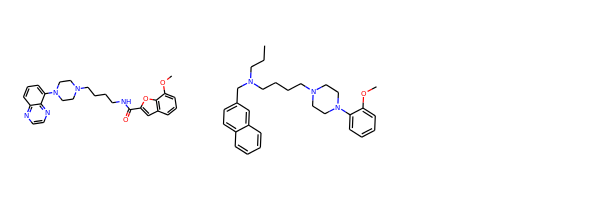

In [787]:
from rdkit import Chem
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
refmol = Chem.MolFromSmiles('CCCN(CCCCN1CCN(c2ccccc2OC)CC1)Cc1ccc2ccccc2c1')
Draw.MolsToGridImage([mol,refmol])

The SimilarityMaps module supports three kind of fingerprints: atom
pairs, topological torsions and Morgan fingerprints.

In [788]:
from rdkit.Chem.Draw import SimilarityMaps
fp = SimilarityMaps.GetAPFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetTTFingerprint(mol, fpType='normal')
fp = SimilarityMaps.GetMorganFingerprint(mol, fpType='bv')

The types of atom pairs and torsions are normal (default), hashed and
bit vector (bv). The types of the Morgan fingerprint are bit vector (bv,
default) and count vector (count).

The function generating a similarity map for two fingerprints requires
the specification of the fingerprint function and optionally the
similarity metric. The default for the latter is the Dice similarity.
Using all the default arguments of the Morgan fingerprint function, the
similarity map can be generated like this:

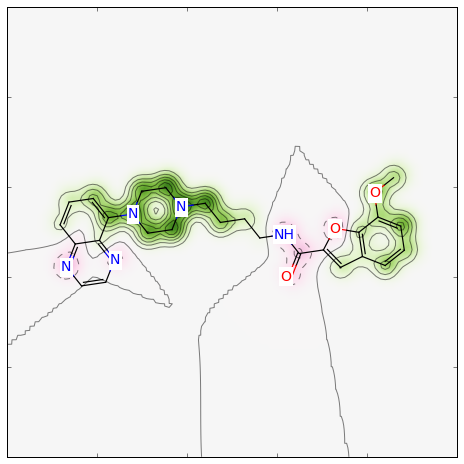

In [789]:
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)

For a different type of Morgan (e.g. count) and radius = 1 instead of 2,
as well as a different similarity metric (e.g. Tanimoto), the call
becomes:

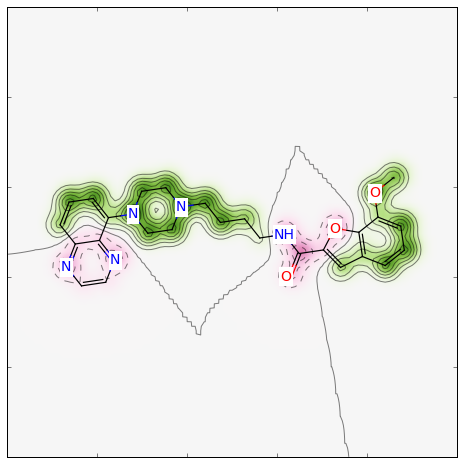

In [790]:
from rdkit import DataStructs
fig, maxweight = SimilarityMaps.GetSimilarityMapForFingerprint(refmol, mol, lambda m,idx:SimilarityMaps.GetMorganFingerprint(m, atomId=idx, radius=1, fpType='count'), metric=DataStructs.TanimotoSimilarity)

The convenience function GetSimilarityMapForFingerprint involves the
normalisation of the atomic weights such that the maximum absolute
weight is 1. Therefore, the function outputs the maximum weight that was
found when creating the map.

In [791]:
print maxweight

0.0574712643678


If one does not want the normalisation step, the map can be created
like:

['0.05 ', '0.07 ', '0.05 ', '0.08 ', '0.05 ', '0.06 ', '0.03 ', '0.04 ', '-0.01 ', '-0.04 ', '-0.03 ', '-0.05 ', '0.01 ', '0.03 ', '0.07 ', '0.10 ', '0.12 ', '0.11 ', '0.09 ', '0.10 ', '0.09 ', '0.06 ', '0.03 ', '0.02 ', '-0.01 ', '-0.05 ', '0.00 ', '0.00 ', '-0.03 ', '0.02 ', '0.09 ', '0.11 ', '-0.04 ', '0.04 ']


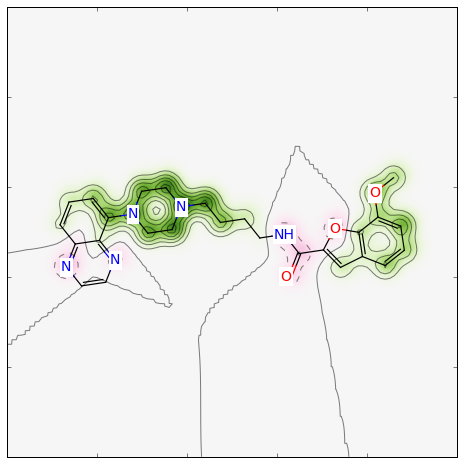

In [792]:
weights = SimilarityMaps.GetAtomicWeightsForFingerprint(refmol, mol, SimilarityMaps.GetMorganFingerprint)
print ["%.2f " % w for w in weights]
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, weights)

<a id='s8'></a>
##Descriptor Calculation

A variety of descriptors are available within the RDKit. The complete
list is provided in List of Available Descriptors.

Most of the descriptors are straightforward to use from Python via the
centralized `rdkit.Chem.Descriptors` module:

In [793]:
from rdkit.Chem import Descriptors, AllChem
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
print Descriptors.TPSA(m)
print Descriptors.MolLogP(m)

37.3
1.3848


Partial charges are handled a bit differently:

In [794]:
m = Chem.MolFromSmiles('c1ccccc1C(=O)O')
AllChem.ComputeGasteigerCharges(m)
print float(m.GetAtomWithIdx(0).GetProp('_GasteigerCharge'))

-0.0476937500465


### Visualization of Descriptors

Similarity maps can be used to visualize descriptors that can be divided
into atomic contributions.

The Gasteiger partial charges can be visualized as (using a different
color scheme):

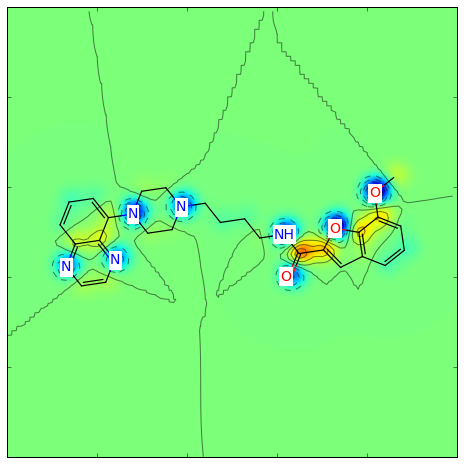

In [795]:
from rdkit.Chem.Draw import SimilarityMaps
mol = Chem.MolFromSmiles('COc1cccc2cc(C(=O)NCCCCN3CCN(c4cccc5nccnc54)CC3)oc21')
AllChem.ComputeGasteigerCharges(mol)
contribs = [float(mol.GetAtomWithIdx(i).GetProp('_GasteigerCharge')) for i in range(mol.GetNumAtoms())]

# Producing this image:
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol, contribs, colorMap='jet', contourLines=10)

Or for the Crippen contributions to logP:

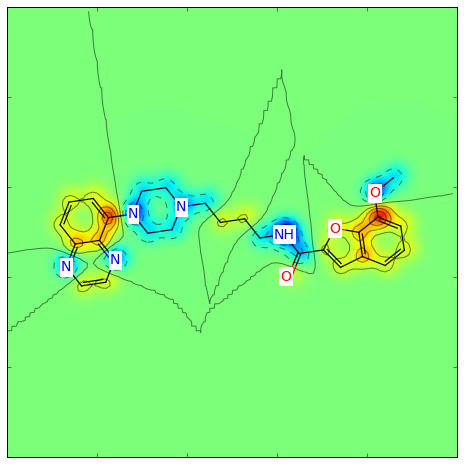

In [796]:
from rdkit.Chem import rdMolDescriptors
contribs = rdMolDescriptors._CalcCrippenContribs(mol)

#Producing this image:
fig = SimilarityMaps.GetSimilarityMapFromWeights(mol,[x for x,y in contribs], colorMap='jet', contourLines=10)

<a id='s9'></a>
##Chemical Reactions

The RDKit also supports applying chemical reactions to sets of
molecules. One way of constructing chemical reactions is to use a
SMARTS-based language similar to Daylight's Reaction SMILES [[14]](#c14):

In [797]:
rxn = AllChem.ReactionFromSmarts('[C:1](=[O:2])-[OD1].[N!H0:3]>>[C:1](=[O:2])[N:3]')
print rxn

In [798]:
ps = rxn.RunReactants((Chem.MolFromSmiles('CC(=O)O'),Chem.MolFromSmiles('NC'))) 
print len(ps) # one entry for each possible set of products 1 
print len(ps[0]) # each entry contains one molecule for each product 1
print Chem.MolToSmiles(ps[0][0])
ps = rxn.RunReactants((Chem.MolFromSmiles('C(COC(=O)O)C(=O)O'),Chem.MolFromSmiles('NC')))
print len(ps)
print Chem.MolToSmiles(ps[0][0])
print Chem.MolToSmiles(ps[1][0])

1
1
CNC(C)=O
2
CNC(=O)OCCC(=O)O
CNC(=O)CCOC(=O)O


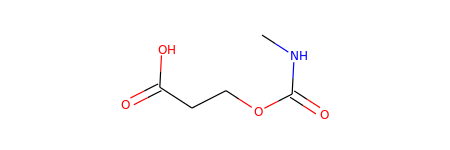

In [799]:
ps[0][0]

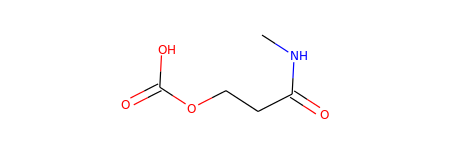

In [800]:
ps[1][0]

Reactions can also be built from MDL rxn files:

1
CNC(C)=O


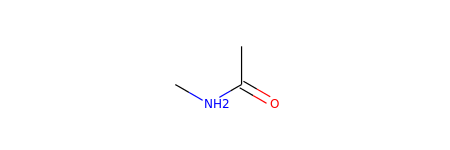

In [801]:
rxn = AllChem.ReactionFromRxnFile('data/AmideBond.rxn')
print rxn
rxn.GetNumReactantTemplates()
rxn.GetNumProductTemplates()
ps = rxn.RunReactants((Chem.MolFromSmiles('CC(=O)O'), Chem.MolFromSmiles('NC')))
print len(ps)
print Chem.MolToSmiles(ps[0][0])
ps[0][0]

It is, of course, possible to do reactions more complex than amide bond
formation:

NC1=CCCC(O)C1


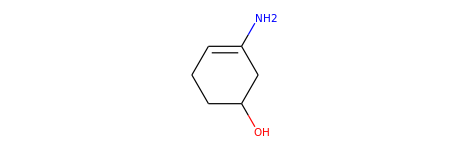

In [802]:
rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2].[C:3]=[*:4][*:5]=[C:6]>>[C:1]1[C:2][C:3][*:4]=[*:5][C:6]1')
ps = rxn.RunReactants((Chem.MolFromSmiles('OC=C'), Chem.MolFromSmiles('C=CC(N)=C')))
print Chem.MolToSmiles(ps[0][0])
ps[0][0]

Note in this case that there are multiple mappings of the reactants onto
the templates, so we have multiple product sets:

In [803]:
len(ps)

4

You can use canonical smiles and a python dictionary to get the unique
products:

In [804]:
uniqps = {}
for p in ps:
    smi = Chem.MolToSmiles(p[0])
    uniqps[smi] = p[0]
print uniqps.keys()

['NC1=CCC(O)CC1', 'NC1=CCCC(O)C1']


Note that the molecules that are produced by the chemical reaction
processing code are not sanitized, as this artificial reaction
demonstrates:

In [805]:
rxn = AllChem.ReactionFromSmarts('[C:1]=[C:2][C:3]=[C:4].[C:5]=[C:6]>>[C:1]1=[C:2][C:3]=[C:4][C:5]=[C:6]1')
ps = rxn.RunReactants((Chem.MolFromSmiles('C=CC=C'), Chem.MolFromSmiles('C=C')))
Chem.MolToSmiles(ps[0][0])
p0 = ps[0][0]
print Chem.SanitizeMol(p0)
print Chem.MolToSmiles(p0)

SANITIZE_NONE
c1ccccc1


### Advanced Reaction Functionality

#### Protecting Atoms

Sometimes, particularly when working with rxn files, it is difficult to
express a reaction exactly enough to not end up with extraneous
products. The RDKit provides a method of "protecting" atoms to disallow
them from taking part in reactions.

This can be demonstrated re-using the amide-bond formation reaction used
above. The query for amines isn't specific enough, so it matches any
nitrogen that has at least one H attached. So if we apply the reaction
to a molecule that already has an amide bond, the amide N is also
treated as a reaction site:

In [806]:
rxn = AllChem.ReactionFromRxnFile('data/AmideBond.rxn')
acid = Chem.MolFromSmiles('CC(=O)O')
base = Chem.MolFromSmiles('CC(=O)NCCN')
ps = rxn.RunReactants((acid,base))
print len(ps)
Chem.MolToSmiles(ps[0][0])
Chem.MolToSmiles(ps[1][0])

2


'CC(=O)NCCNC(C)=O'

The first product corresponds to the reaction at the amide N.

We can prevent this from happening by protecting all amide Ns. Here we
do it with a substructure query that matches amides and thioamides and
then set the "\_protected" property on matching atoms:

In [807]:
amidep = Chem.MolFromSmarts('[N;$(NC=[O,S])]')
for match in base.GetSubstructMatches(amidep):
    base.GetAtomWithIdx(match[0]).SetProp('_protected','1')

Now the reaction only generates a single product:

In [808]:
ps = rxn.RunReactants((acid,base))
print len(ps)
print Chem.MolToSmiles(ps[0][0])

1
CC(=O)NCCNC(C)=O


### Recap Implementation

Associated with the chemical reaction functionality is an implementation
of the Recap algorithm. [[15]](#c15) Recap uses a set of chemical
transformations mimicking common reactions carried out in the lab in
order to decompose a molecule into a series of reasonable fragments.

The RDKit rdkit.Chem.Recap implementation keeps track of the hierarchy
of transformations that were applied:

In [809]:
from rdkit import Chem
from rdkit.Chem import Recap
m = Chem.MolFromSmiles('c1ccccc1OCCOC(=O)CC')
hierarch = Recap.RecapDecompose(m)
type(hierarch)

rdkit.Chem.Recap.RecapHierarchyNode

The hierarchy is rooted at the original molecule:

In [810]:
hierarch.smiles

'CCC(=O)OCCOc1ccccc1'

and each node tracks its children using a dictionary keyed by SMILES:

In [811]:
ks=hierarch.children.keys()
ks.sort()
print ks

['[*]C(=O)CC', '[*]CCOC(=O)CC', '[*]CCOc1ccccc1', '[*]OCCOc1ccccc1', '[*]c1ccccc1']


The nodes at the bottom of the hierarchy (the leaf nodes) are easily
accessible, also as a dictionary keyed by SMILES:

In [812]:
ks=hierarch.GetLeaves().keys()
ks.sort()
print ks

['[*]C(=O)CC', '[*]CCO[*]', '[*]CCOc1ccccc1', '[*]c1ccccc1']


Notice that dummy atoms are used to mark points where the molecule was
fragmented.

The nodes themselves have associated molecules:

In [813]:
leaf = hierarch.GetLeaves()[ks[0]]
print Chem.MolToSmiles(leaf.mol)

[*]C(=O)CC


### BRICS Implementation

The RDKit also provides an implementation of the BRICS algorithm. [[16]](#c16)
BRICS provides another method for fragmenting molecules along
synthetically accessible bonds:

In [814]:
from rdkit.Chem import BRICS
cdk2mols = Chem.SDMolSupplier('data/cdk2.sdf')
m1 = cdk2mols[0]
print list(BRICS.BRICSDecompose(m1))
m2 = cdk2mols[20]
print list(BRICS.BRICSDecompose(m2))

['[4*]CC(=O)C(C)C', '[14*]c1nc(N)nc2[nH]cnc12', '[3*]O[3*]']
['[3*]OC', '[1*]C(=O)NN(C)C', '[14*]c1[nH]nc2c1C(=O)c1c([16*])cccc1-2', '[5*]N[5*]', '[16*]c1ccc([16*])cc1']


Notice that RDKit BRICS implementation returns the unique fragments
generated from a molecule and that the dummy atoms are tagged to
indicate which type of reaction applies.

It's quite easy to generate the list of all fragments for a group of
molecules:

In [815]:
allfrags=set()
for m in cdk2mols:
    pieces = BRICS.BRICSDecompose(m)
    allfrags.update(pieces)
print len(allfrags)
print list(allfrags)[:5]

90
['[4*]CC[NH3+]', '[14*]c1cnc[nH]1', '[16*]c1ccc([16*])c(Cl)c1', '[15*]C1CCCC1', '[7*]C1C(=O)Nc2ccc(S([12*])(=O)=O)cc21']


The BRICS module also provides an option to apply the BRICS rules to a
set of fragments to create new molecules:

In [816]:
import random
random.seed(127)
fragms = [Chem.MolFromSmiles(x) for x in allfrags]
ms = BRICS.BRICSBuild(fragms)

The result is a generator object:

In [817]:
ms

<generator object BRICSBuild at 0x7f7f208cf140>

That returns molecules on request:

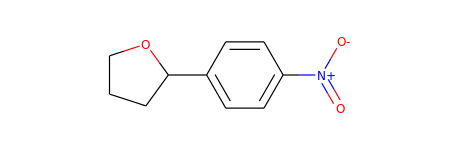

In [818]:
prods = [ms.next() for x in range(10)]
prods[0]

The molecules have not been sanitized, so it's a good idea to at least
update the valences before continuing:

In [819]:
for prod in prods:
    prod.UpdatePropertyCache(strict=False)
print Chem.MolToSmiles(prods[0],True)
print Chem.MolToSmiles(prods[1],True)
print Chem.MolToSmiles(prods[2],True)

O=[N+]([O-])c1ccc(C2CCCO2)cc1
c1ccc(C2CCCO2)cc1
NS(=O)(=O)c1ccc(C2CCCO2)cc1


### Other fragmentation approaches

In addition to the methods described above, the RDKit provide a very
flexible generic function for fragmenting molecules along user-specified
bonds.

Here's a quick demonstration of using that to break all bonds between
atoms in rings and atoms not in rings. We start by finding all the atom
pairs:

In [820]:
m = Chem.MolFromSmiles('CC1CC(O)C1CCC1CC1')
bis = m.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]'))
bis

((0, 1), (4, 3), (6, 5), (7, 8))

then we get the corresponding bond indices:

In [821]:
bs = [m.GetBondBetweenAtoms(x,y).GetIdx() for x,y in bis]
bs

[0, 3, 5, 7]

then we use those bond indices as input to the fragmentation function:

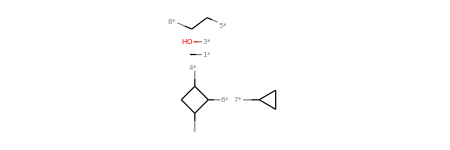

In [822]:
nm = Chem.FragmentOnBonds(m,bs)
nm

the output is a molecule that has dummy atoms marking the places where
bonds were broken:

In [823]:
Chem.MolToSmiles(nm,True)

'[*]C1CC([4*])C1[6*].[1*]C.[3*]O.[5*]CC[8*].[7*]C1CC1'

By default the attachment points are labelled (using isotopes) with the
index of the atom that was removed. We can also provide our own set of
atom labels in the form of pairs of unsigned integers. The first value
in each pair is used as the label for the dummy that replaces the bond's
begin atom, the second value in each pair is for the dummy that replaces
the bond's end atom. Here's an example, repeating the analysis above and
marking the positions where the non-ring atoms were with the label 10
and marking the positions where the ring atoms were with label 1:

In [824]:
bis = m.GetSubstructMatches(Chem.MolFromSmarts('[!R][R]'))
bs = []
labels=[]
for bi in bis:
    b = m.GetBondBetweenAtoms(bi[0],bi[1])
    if b.GetBeginAtomIdx()==bi[0]:
        labels.append((10,1))
    else:
        labels.append((1,10))
    bs.append(b.GetIdx())
nm = Chem.FragmentOnBonds(m,bs,dummyLabels=labels)
Chem.MolToSmiles(nm,True)

'[1*]C.[1*]CC[1*].[1*]O.[10*]C1CC([10*])C1[10*].[10*]C1CC1'

<a id='s10'></a>
##Chemical Features and Pharmacophores


### Chemical Features

Chemical features in the RDKit are defined using a SMARTS-based feature
definition language (described in detail in the RDKit book). To identify
chemical features in molecules, you first must build a feature factory:


In [825]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
from rdkit import RDConfig
import os
fdefName = os.path.join(RDConfig.RDDataDir,'BaseFeatures.fdef')
factory = ChemicalFeatures.BuildFeatureFactory(fdefName)

and then use the factory to search for features:

In [826]:
m = Chem.MolFromSmiles('OCc1ccccc1CN')
feats = factory.GetFeaturesForMol(m)
len(feats)

8

The individual features carry information about their family (e.g.
donor, acceptor, etc.), type (a more detailed description), and the
atom(s) that is/are associated with the feature:

In [827]:
print feats[0].GetFamily()
print feats[0].GetType()
print feats[0].GetAtomIds()
print feats[4].GetFamily()
print feats[4].GetAtomIds()

Donor
SingleAtomDonor
(0,)
Aromatic
(2, 3, 4, 5, 6, 7)


If the molecule has coordinates, then the features will also have
reasonable locations:

In [828]:
from rdkit.Chem import AllChem
AllChem.Compute2DCoords(m)
print feats[0].GetPos()
print list(feats[0].GetPos())

[2.0705367611607857, -2.3356749604090465, 0.0]


### 2D Pharmacophore Fingerprints

Combining a set of chemical features with the 2D (topological) distances
between them gives a 2D pharmacophore. When the distances are binned,
unique integer ids can be assigned to each of these pharmacophores and
they can be stored in a fingerprint. Details of the encoding are in the
RDKit\_Book.

Generating pharmacophore fingerprints requires chemical features
generated via the usual RDKit feature-typing mechanism:

In [829]:
from rdkit import Chem
from rdkit.Chem import ChemicalFeatures
fdefName = 'data/MinimalFeatures.fdef'
featFactory = ChemicalFeatures.BuildFeatureFactory(fdefName)

The fingerprints themselves are calculated using a signature
(fingerprint) factory, which keeps track of all the parameters required
to generate the pharmacophore:

In [830]:
from rdkit.Chem.Pharm2D.SigFactory import SigFactory
sigFactory = SigFactory(featFactory,minPointCount=2,maxPointCount=3) 
sigFactory.SetBins([(0,2),(2,5),(5,8)])
sigFactory.Init()
sigFactory.GetSigSize()

885

The signature factory is now ready to be used to generate fingerprints,
a task which is done using the rdkit.Chem.Pharm2D.Generate module:

In [831]:
from rdkit.Chem.Pharm2D import Generate
mol = Chem.MolFromSmiles('OCC(=O)CCCN')
fp = Generate.Gen2DFingerprint(mol,sigFactory)
print fp
print len(fp)
print fp.GetNumOnBits()

885
57


Details about the bits themselves, including the features that are
involved and the binned distance matrix between the features, can be
obtained from the signature factory:

In [832]:
print list(fp.GetOnBits())[:5]
print sigFactory.GetBitDescription(1) 
print sigFactory.GetBitDescription(2) 
print sigFactory.GetBitDescription(8) 
print list(fp.GetOnBits())[-5:]
print sigFactory.GetBitDescription(707) 
print sigFactory.GetBitDescription(714)

[1, 2, 6, 7, 8]
Acceptor Acceptor |0 1|1 0|
Acceptor Acceptor |0 2|2 0|
Acceptor Donor |0 2|2 0|
[704, 706, 707, 708, 714]
Donor Donor PosIonizable |0 1 2|1 0 1|2 1 0|
Donor Donor PosIonizable |0 2 2|2 0 0|2 0 0|


For the sake of convenience (to save you from having to edit the fdef
file every time) it is possible to disable particular feature types
within the SigFactory:

In [833]:
sigFactory.skipFeats=['PosIonizable']
sigFactory.Init()
sigFactory.GetSigSize()
fp2 = Generate.Gen2DFingerprint(mol,sigFactory)
fp2.GetNumOnBits()

36

Another possible set of feature definitions for 2D pharmacophore
fingerprints in the RDKit are those published by Gobbi and Poppinger.
[[17]](#c17) The module `rdkit.Chem.Pharm2D.Gobbi_Pharm2D` has a pre-configured
signature factory for these fingerprint types. Here's an example of
using it:

In [834]:
from rdkit import Chem
from rdkit.Chem.Pharm2D import Gobbi_Pharm2D,Generate
m = Chem.MolFromSmiles('OCC=CC(=O)O')
fp = Generate.Gen2DFingerprint(m,Gobbi_Pharm2D.factory)
print fp
print fp.GetNumOnBits()
print list(fp.GetOnBits())
print Gobbi_Pharm2D.factory.GetBitDescription(157)
print Gobbi_Pharm2D.factory.GetBitDescription(30184)

8
[23, 30, 150, 154, 157, 185, 28878, 30184]
HA HD |0 3|3 0|
HA HD HD |0 3 0|3 0 3|0 3 0|


<a id='s11'></a>
##Molecular Fragments


The RDKit contains a collection of tools for fragmenting molecules and
working with those fragments. Fragments are defined to be made up of a
set of connected atoms that may have associated functional groups. This
is more easily demonstrated than explained:


In [835]:
fName=os.path.join(RDConfig.RDDataDir,'FunctionalGroups.txt')
from rdkit.Chem import FragmentCatalog
fparams = FragmentCatalog.FragCatParams(1,6,fName)
fparams.GetNumFuncGroups()

39

In [836]:
fcat=FragmentCatalog.FragCatalog(fparams)
fcgen=FragmentCatalog.FragCatGenerator()
m = Chem.MolFromSmiles('OCC=CC(=O)O')
fcgen.AddFragsFromMol(m,fcat)
print fcat.GetEntryDescription(0) 
print fcat.GetEntryDescription(1) 
print fcat.GetEntryDescription(2) 

C<-O>C
C=C<-C(=O)O>
C<-C(=O)O>=CC<-O>


The fragments are stored as entries in a
rdkit.Chem.rdfragcatalog.FragCatalog. Notice that the entry descriptions
include pieces in angular brackets (e.g. between '<' and '\>'). These
describe the functional groups attached to the fragment. For example, in
the above example, the catalog entry 0 corresponds to an ethyl fragment
with an alcohol attached to one of the carbons and entry 1 is an
ethylene with a carboxylic acid on one carbon. Detailed information
about the functional groups can be obtained by asking the fragment for
the ids of the functional groups it contains and then looking those ids
up in the rdkit.Chem.rdfragcatalog.FragCatParams object:

[34, 1]


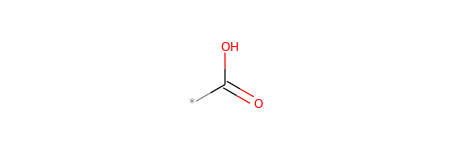

In [837]:
print list(fcat.GetEntryFuncGroupIds(2))
fparams.GetFuncGroup(1)

In [838]:
print Chem.MolToSmarts(fparams.GetFuncGroup(1)) 
print Chem.MolToSmarts(fparams.GetFuncGroup(34)) 
print fparams.GetFuncGroup(1).GetProp('_Name') 
print fparams.GetFuncGroup(34).GetProp('_Name')

*-C(=O)-,:[O&D1]
*-[O&D1]
-C(=O)O
-O


The catalog is hierarchical: smaller fragments are combined to form
larger ones. From a small fragment, one can find the larger fragments to
which it contributes using the
rdkit.Chem.rdfragcatalog.FragCatalog.GetEntryDownIds method:

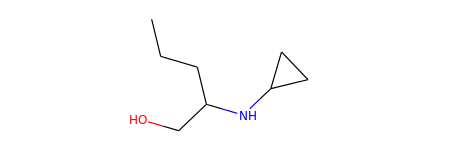

In [839]:
fcat=FragmentCatalog.FragCatalog(fparams)
m = Chem.MolFromSmiles('OCC(NC1CC1)CCC')
m

In [840]:
fcgen.AddFragsFromMol(m,fcat)
print fcat.GetEntryDescription(0)
print fcat.GetEntryDescription(1)
print list(fcat.GetEntryDownIds(0))
print fcat.GetEntryDescription(3)
print fcat.GetEntryDescription(4)

C<-O>C
CN<-cPropyl>
[3, 4]
C<-O>CC
C<-O>CN<-cPropyl>


The fragments from multiple molecules can be added to a catalog:

In [841]:
suppl = Chem.SmilesMolSupplier('data/bzr.smi')
ms = [x for x in suppl]
fcat=FragmentCatalog.FragCatalog(fparams)
for m in ms:
    nAdded = fcgen.AddFragsFromMol(m,fcat)
print fcat.GetNumEntries()
print fcat.GetEntryDescription(0)
print fcat.GetEntryDescription(100)

1169
Cc
cc-nc(C)n


The fragments in a catalog are unique, so adding a molecule a second
time doesn't add any new entries:

In [842]:
fcgen.AddFragsFromMol(ms[0],fcat)
fcat.GetNumEntries()

1169

Once a rdkit.Chem.rdfragcatalog.FragCatalog has been generated, it can
be used to fingerprint molecules:

In [843]:
fpgen = FragmentCatalog.FragFPGenerator()
fp = fpgen.GetFPForMol(ms[8],fcat)
fp

In [844]:
fp.GetNumOnBits()

189

The rest of the machinery associated with fingerprints can now be
applied to these fragment fingerprints. For example, it's easy to find
the fragments that two molecules have in common by taking the
intersection of their fingerprints:

In [845]:
fp2 = fpgen.GetFPForMol(ms[7],fcat)
andfp = fp&fp2
obl = list(andfp.GetOnBits())
print fcat.GetEntryDescription(obl[-1])
print fcat.GetEntryDescription(obl[-5])

ccc(cc)NC<=O>
c<-X>ccc(N)cc


or we can find the fragments that distinguish one molecule from another:

In [846]:
combinedFp = fp&(fp^fp2) # can be more efficent than fp&(!fp2)
obl = list(combinedFp.GetOnBits())
fcat.GetEntryDescription(obl[-1])

'cccc(N)cc'

Or we can use the bit ranking functionality from the
rdkit.ML.InfoTheory.rdInfoTheory.InfoBitRanker class to identify
fragments that distinguish actives from inactives:

In [847]:
suppl = Chem.SDMolSupplier('data/bzr.sdf')
sdms = [x for x in suppl]
fps = [fpgen.GetFPForMol(x,fcat) for x in sdms]
from rdkit.ML.InfoTheory import InfoBitRanker
ranker = InfoBitRanker(len(fps[0]),2)
acts = [float(x.GetProp('ACTIVITY')) for x in sdms]
for i,fp in enumerate(fps):
    act = int(acts[i]>7)
    ranker.AccumulateVotes(fp,act)
top5 = ranker.GetTopN(5)
for id,gain,n0,n1 in top5:
    print int(id),'%.3f'%gain,int(n0),int(n1)

702 0.081 20 17
328 0.073 23 25
341 0.073 30 43
173 0.073 30 43
1034 0.069 5 53


The columns above are: bitId, infoGain, nInactive, nActive. Note that
this approach isn't particularly effective for this artificial example.

<a id='s12'></a>
##Non-Chemical Functionality

### Bit vectors

Bit vectors are containers for efficiently storing a set number of
binary values, e.g. for fingerprints. The RDKit includes two types of
fingerprints differing in how they store the values internally; the two
types are easily interconverted but are best used for different purpose:
    
-   SparseBitVects store only the list of bits set in the vector; they
    are well suited for storing very large, very sparsely occupied
    vectors like pharmacophore fingerprints. Some operations, such as
    retrieving the list of on bits, are quite fast. Others, such as
    negating the vector, are very, very slow.
-   ExplicitBitVects keep track of both on and off bits. They are
    generally faster than SparseBitVects, but require more memory to
    store.

### Discrete value vectors

### 3D grids

### Points


<a id='s13'></a>
##Getting Help


There is a reasonable amount of documentation available within from the
RDKit's docstrings. These are accessible using Python's help command:

In [848]:
m = Chem.MolFromSmiles('Cc1ccccc1')
m.GetNumAtoms()
help(m.GetNumAtoms)

Help on method GetNumAtoms:

GetNumAtoms(...) method of rdkit.Chem.rdchem.Mol instance
    GetNumAtoms( (Mol)arg1 [, (int)onlyHeavy=-1 [, (bool)onlyExplicit=True]]) -> int :
        Returns the number of atoms in the molecule.
        
          ARGUMENTS:
            - onlyExplicit: (optional) include only explicit atoms (atoms in the molecular graph)
                            defaults to 1.
          NOTE: the onlyHeavy argument is deprecated
        
    
        C++ signature :
            int GetNumAtoms(RDKit::ROMol [,int=-1 [,bool=True]])



In [849]:
m.GetNumAtoms(onlyExplicit=False)

15

When working in an environment that does command completion or tooltips,
one can see the available methods quite easily. Here's a sample
screenshot from within Mark Hammond's PythonWin environment:

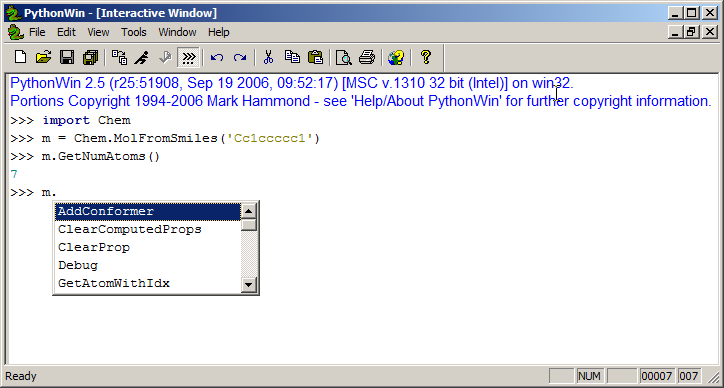

In [850]:
Image('images/picture_6.png')

<a id='s14'></a>
##Advanced Topics/Warnings

### Editing Molecules

Some of the functionality provided allows molecules to be edited “in
place”:

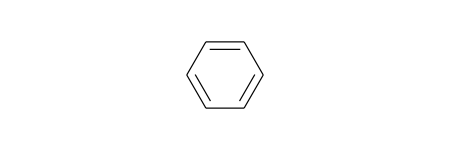

In [851]:
m = Chem.MolFromSmiles('c1ccccc1')
m

In [852]:
m.GetAtomWithIdx(0).SetAtomicNum(7)
Chem.SanitizeMol(m)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

In [853]:
Chem.MolToSmiles(m)

'c1ccncc1'

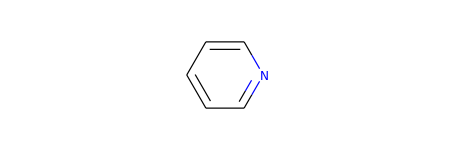

In [854]:
m

Do not forget the sanitization step, without it one can end up with
results that look ok (so long as you don't think):

In [855]:
m = Chem.MolFromSmiles('c1ccccc1')
m.GetAtomWithIdx(0).SetAtomicNum(8)
Chem.MolToSmiles(m)

'c1ccocc1'

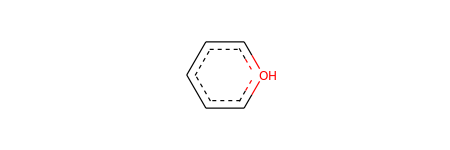

In [856]:
m

but that are, of course, complete nonsense, as sanitization will
indicate:

In [857]:
try:
    Chem.SanitizeMol(m)
except ValueError as e:
    print e

Sanitization error: Can't kekulize mol 



More complex transformations can be carried out using the `RWMol` class:

In [858]:
m = Chem.MolFromSmiles('CC(=O)C=CC=C')
mw = Chem.RWMol(m)
mw.ReplaceAtom(4,Chem.Atom(7))
mw.AddAtom(Chem.Atom(6))
mw.AddAtom(Chem.Atom(6))
mw.AddBond(6,7,Chem.BondType.SINGLE)
mw.AddBond(7,8,Chem.BondType.DOUBLE)
mw.AddBond(8,3,Chem.BondType.SINGLE)
mw.RemoveAtom(0)
mw.GetNumAtoms()

8

The `RWMol` can be used just like an `ROMol`:

O=CC1C=CC=CN=1


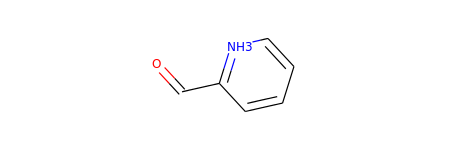

In [859]:
print Chem.MolToSmiles(mw)
mw

In [860]:
Chem.SanitizeMol(mw)

rdkit.Chem.rdmolops.SanitizeFlags.SANITIZE_NONE

O=Cc1ccccn1


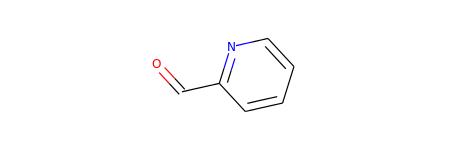

In [861]:
print Chem.MolToSmiles(mw)
mw

It is even easier to generate nonsense using the `RWMol` than it is with standard molecules. If you need chemically reasonable results, be certain to sanitize the results.

<a id='s15'></a>
##Miscellaneous Tips and Hints

### Chem vs AllChem

The majority of “basic” chemical functionality (e.g. reading/writing
molecules, substructure searching, molecular cleanup, etc.) is in the
`rdkit.Chem` module. More advanced, or less frequently used, functionality
is in `rdkit.Chem.AllChem`. The distinction has been made to speed startup
and lower import times; there's no sense in loading the 2D->3D library
and force field implementation if one is only interested in reading and
writing a couple of molecules. If you find the Chem/AllChem thing
annoying or confusing, you can use python's `import ... as ...` syntax
to remove the irritation:

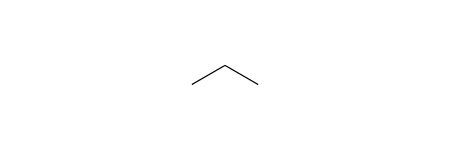

In [862]:
from rdkit.Chem import AllChem as Chem
m = Chem.MolFromSmiles('CCC')
m

### The SSSR Problem

As others have ranted about with more energy and eloquence than I intend
to, the definition of a molecule's smallest set of smallest rings is not
unique. In some high symmetry molecules, a “true” SSSR will give results
that are unappealing. For example, the SSSR for cubane only contains 5
rings, even though there are “obviously” 6. This problem can be fixed by
implementing a *small* (instead of *smallest*) set of smallest rings
algorithm that returns symmetric results. This is the approach that we
took with the RDKit.

Because it is sometimes useful to be able to count how many SSSR rings
are present in the molecule, there is a rdkit.Chem.rdmolops.GetSSSR
function, but this only returns the SSSR count, not the potentially
non-unique set of rings.

<a id='s16'></a>
##List of Available Descriptors

| Descriptor/Descriptor Family                                            |       Notes                |
|-------------------------------------------------------------------------|----------------------------|
| Gasteiger/Marsili Partial Charges                 |*Tetrahedron* **36**:   3219-28 (1980)                     |
| BalabanJ                                           |            *Chem. Phys. Lett.*      **89**:     399-404 (1982)           |
| BertzCT                       |          *J. Am. Chem. Soc.*         **103**:  3599-601 (1981)            |
| Ipc                               |      *J. Chem. Phys.* **67**:         4517-33      (1977)                 |
| HallKierAlpha                        |   *Rev. Comput. Chem.*                                       **2**:                                                                    367-422 (1991)             |
| Kappa1 - Kappa3        |              *Rev. Comput. Chem.*            **2**:                   367-422 (1991)           |
| Chi0, Chi1             |               *Rev. Comput. Chem.*           **2**:                   367-422 (1991)           |
| Chi0n - Chi4n          |                *Rev. Comput. Chem.*         **2**:                    367-422 (1991)           |
| Chi0v - Chi4v          |               *Rev. Comput. Chem.*          **2**:                    367-422 (1991)             |
| MolLogP                |                 Wildman and Crippen *JCICS*    **39**: 868-73 (1999)              |
| MolMR                  |                 Wildman and Crippen *JCICS*     **39**:    868-73 (1999)              |
| MolWt                                                                   |                            |
| ExactMolWt                                                              |                            |
| HeavyAtomCount                                                          |                            |
| HeavyAtomMolWt                                                          |                            |
| NHOHCount                                                               |                            |
| NOCount                                                                 |                            |
| NumHAcceptors                                                           |                            |
| NumHDonors                                                              |                            |
| NumHeteroatoms                                                          |                            |
| NumRotatableBonds                                                       |                            |
| NumValenceElectrons                                                     |                            |
| NumAmideBonds                                                           |                            |
| Num{Aromatic,Saturated,Aliphatic}Rings                                  |                            |
| Num{Aromatic,Saturated,Aliphatic}{Hetero,Carbo}cycles                   |                            |
| RingCount                                                               |                            |
| FractionCSP3                                                            |                            |
| TPSA                               |     *J. Med. Chem.* **43**:           3714-7,               (2000)    |
| LabuteASA                          |     *J. Mol. Graph. Mod.*           **18**: 464-77 (2000)              |
| PEOE_VSA1 - PEOE_VSA14              |  MOE-type descriptors using partial charges and surface area contributions <http://www.chemcomp.com/journal/vsadesc.htm>      |                               
| SMR_VSA1 - SMR_VSA10                |  MOE-type descriptors using MR contributions and surface area contributions <http://www.chemcomp.com/journal/vsadesc.htm> |                                                   
| SlogP_VSA1 - SlogP_VSA12           |   MOE-type descriptors using LogP contributions and surface area contributions <http://www.chemcomp.com/journal/vsadesc.htm> |                                                       
| EState_VSA1 - EState_VSA11           | MOE-type descriptors using EState indices and surface area contributions (developed at RD, not described in the CCG paper)    |                    
|VSA_EState1 - VSA_EState10          |  MOE-type descriptors using EState indices and surface area contributions (developed at RD, not described in the CCG paper)          |
| MQNs                  |                  Nguyen et al. *ChemMedChem*    **4**:                 1803-5 (2009)              |
| Topliss fragments                  |     implemented using a set of SMARTS definitions in $(RDBASE)/Data/FragmentDescriptors.csv          |

<a id='s17'></a>
##List of Available Fingerprints

| Fingerprint Type     | Notes                                                                                                    |
|----------------------|----------------------------------------------------------------------------------------------------------|
| RDKit                | A Daylight-like fingerprint based on hashing molecular subgraphs.                                        |
| Atom Pairs           | *JCICS* 25:64-73 (1985)                                                                                    |
| Topological Torsions | *JCICS* 27:82-5 (1987)                                                                                     |
| MACCS keys           | Using the 166 public keys implemented as SMARTS.                                                         |
| Morgan/Circular      | Fingerprints based on the Morgan algorithm, similar to the ECFP/FCFP fingerprints *JCIM* 50:742-54 (2010). |
| 2D Pharmacophore     | Uses topological distances between pharmacophoric points.                                                |
| Pattern              | A topological fingerprint optimized for substructure screening.                                          |

<a id='s18'></a>
##Feature Definitions Used in the Morgan Fingerprints


These are adapted from the definitions in Gobbi, A. & Poppinger, D.
“Genetic optimization of combinatorial libraries.” *Biotechnology and
Bioengineering* **61**, 47-54 (1998).

| Feature  | SMARTS                                                                                                                                                             |
|----------|--------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Donor    | `[$([N;!H0;v3,v4&+1]),$([O,S;H1;+0]),n&H1&+0]`|
| Acceptor | `[$([O,S;H1;v2;!$(*-*=[O,N,P,S])]),$([O,S;H0;v2]),$([O,S;-]),$([N;v3;!$(N-*=[O,N,P,S])]),n&H0&+0,$([o,s;+0;!$([o,s]:n);!$([o,s]:c:n)])]`|
| Aromatic | `[a]`                                                                                                                                                              |
| Halogen  | `[F,Cl,Br,I]`                                                                                                                                                      |
| Basic    | `[#7;+,$([N;H2&+0][$([C,a]);!$([C,a](=O))]),$([N;H1&+0]([$([C,a]);!$([C,a](=O))])[$([C,a]);!$([C,a](=O))]),$([N;H0&+0]([C;!$(C(=O))])([C;!$(C(=O))])[C;!$(C(=O))])]` |
| Acidic   | `[$([C,S](=[O,S,P])-[O;H1,-1])]` |

**Footnotes**

<a id='c1'></a>
[1]: Blaney, J. M.; Dixon, J. S. "Distance Geometry in Molecular
    Modeling". *Reviews in Computational Chemistry*; VCH: New York, 1994.

<a id='c2'></a>
[2]: Rappé, A. K.; Casewit, C. J.; Colwell, K. S.; Goddard III, W. A.;
    Skiff, W. M. "UFF, a full periodic table force field for molecular
    mechanics and molecular dynamics simulations". *J. Am. Chem. Soc.*
    **114**:10024-35 (1992) .

<a id='c3'></a>
[3]: Halgren, T. A. "Merck molecular force field. I. Basis, form,
    scope, parameterization, and performance of MMFF94." *J. Comp.
    Chem.* **17**:490–19 (1996).

<a id='c4'></a>
[4]: Halgren, T. A. "Merck molecular force field. II. MMFF94 van der
    Waals and electrostatic parameters for intermolecular interactions."
    *J. Comp. Chem.* **17**:520–52 (1996).

<a id='c5'></a>
[5]: Halgren, T. A. "Merck molecular force field. III. Molecular
    geometries and vibrational frequencies for MMFF94." *J. Comp. Chem.*
    **17**:553–86 (1996).

<a id='c6'></a>
[6]: Halgren, T. A. & Nachbar, R. B. "Merck molecular force field. IV.
    conformational energies and geometries for MMFF94." *J. Comp. Chem.*
    **17**:587-615 (1996).

<a id='c7'></a>
[7]: Halgren, T. A. "MMFF VI. MMFF94s option for energy minimization
    studies." *J. Comp. Chem.* **20**:720–9 (1999).

<a id='c8'></a>
[8]: Bemis, G. W.; Murcko, M. A. "The Properties of Known Drugs. 1.
    Molecular Frameworks." *J. Med. Chem.* **39**:2887-93 (1996).

<a id='c9'></a>
[9]: Carhart, R.E.; Smith, D.H.; Venkataraghavan R. “Atom Pairs as
    Molecular Features in Structure-Activity Studies: Definition and
    Applications” *J. Chem. Inf. Comp. Sci.* **25**:64-73 (1985).

<a id='c10'></a>
[10]: Nilakantan, R.; Bauman N.; Dixon J.S.; Venkataraghavan R.
    “Topological Torsion: A New Molecular Descriptor for SAR
    Applications. Comparison with Other Desciptors.” *J. Chem.Inf. Comp.
    Sci.* **27**:82-5 (1987).

<a id='c11'></a>
[11]: Rogers, D.; Hahn, M. “Extended-Connectivity Fingerprints.” *J.
    Chem. Inf. and Model.* **50**:742-54 (2010).

<a id='c12'></a>
[12]: Ashton, M. et al. “Identification of Diverse Database Subsets
    using Property-Based and Fragment-Based Molecular Descriptions.”
    *Quantitative Structure-Activity Relationships* **21**:598-604
    (2002).

<a id='c13'></a>
[13]: Riniker, S.; Landrum, G. A. "Similarity Maps - A Visualization
    Strategy for Molecular Fingerprints and Machine-Learning Methods"
    *J. Cheminf.* **5**:43 (2013).

<a id='c14'></a>
[14]: A more detailed description of reaction SMARTS, as defined by the
    RDKit, is in the RDKit Book.

<a id='c15'></a>
[15]: Lewell, X.Q.; Judd, D.B.; Watson, S.P.; Hann, M.M.
    “RECAP-Retrosynthetic Combinatorial Analysis Procedure: A Powerful
    New Technique for Identifying Privileged Molecular Fragments with
    Useful Applications in Combinatorial Chemistry” *J. Chem. Inf. Comp.
    Sci.* **38**:511-22 (1998).

<a id='c16'></a>
[16]: Degen, J.; Wegscheid-Gerlach, C.; Zaliani, A; Rarey, M. "On the
    Art of Compiling and Using ‘Drug-Like’ Chemical Fragment Spaces."
    *ChemMedChem* **3**:1503–7 (2008).

<a id='c17'></a>
[17]: Gobbi, A. & Poppinger, D. "Genetic optimization of combinatorial
    libraries." *Biotechnology and Bioengineering* **61**:47-54 (1998).

<a id='s19'></a>
##License

In [863]:
Image('images/picture_5.png')

This document is copyright (C) 2007-2013 by Greg Landrum

This work is licensed under the Creative Commons Attribution-ShareAlike
3.0 License. To view a copy of this license, visit
<http://creativecommons.org/licenses/by-sa/3.0/> or send a letter to
Creative Commons, 543 Howard Street, 5th Floor, San Francisco,
California, 94105, USA.

The intent of this license is similar to that of the RDKit itself. In
simple words: “Do whatever you want with it, but please give us some
credit.”